# <span style=color:blue> Useful Modules</span>
In this chapter, several useful modules are introduced. These modules include the following:
+ Modules for date & time manipulation
  + time
  + datetime
+ Regular expressions
  + re
+ Operating system interfaces  
  + os
  + os.path
+ Unix style pathname pattern expansion
  + glob
+ Python object serialization   
  + pickle
+ Python object persistence  
  + shelve
+ JSON encoder and decoder
  + json
+ Reading and writing CSV files
  + csv

-----
# <span style=color:blue> time and datetime </span>
+ The time module provides many time-related functions, which often call platform C library functions with the same names.
  + The epoch is the point where the time starts, and is dependent on platforms. For Unix, the epoch is January 1, 1970, 00:00:00 (UTC).  We can look at time.gmtime(0) to find out the epoch on our platforms.

  + The coordinated universal time (UTC) is the primary time standard by which the world regulates clocks and times. 
https://en.wikipedia.org/wiki/Coordinated_Universal_Time
+ The datetime module provides many functions to convert between several time formats and to calculate time with consideration of leap years and time zones.
-----
# <span style=color:blue> time Module</span>

In [1]:
# coding=Big5
import time
time.gmtime(0)

time.struct_time(tm_year=1970, tm_mon=1, tm_mday=1, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=3, tm_yday=1, tm_isdst=0)

+ time.struct_time https://docs.python.org/2/library/time.html

Attribute  | Value
---------- | ----------
tm_year | (for example, 1993)
tm_mon | range [1, 12]
tm_mday |range [1,31]
tm_hour | range [0,23]
tm_min | range [0,59]
tm_sec | range [0,61]
tm_wday|range [0, 6], Monday is 0
tm_yday|range [1, 366]
tm_isdst| 0, 1 or -1
 
In calls to mktime(), tm_isdst may be set to 1 when daylight savings time is in effect, and 0 when it is not. A value of -1 indicates that this is not known, and will usually result in the correct state being filled in. 

In [2]:
globalt = time.gmtime()
localt = time.localtime()
print(globalt) 
print(localt)
 

time.struct_time(tm_year=2018, tm_mon=9, tm_mday=5, tm_hour=2, tm_min=20, tm_sec=29, tm_wday=2, tm_yday=248, tm_isdst=0)
time.struct_time(tm_year=2018, tm_mon=9, tm_mday=5, tm_hour=10, tm_min=20, tm_sec=29, tm_wday=2, tm_yday=248, tm_isdst=0)


+ __altzone__: the offset of the local DST timezone;
+ __asctime([t])__: convert a tuple or struct_time to a string of the form 'Sun Jun 20 23:21:05 1993’;
+ __clock()__: on windows, clock() returns seconds since the first call to this function; on unix, clock() returns the current process time (seconds)
+ __ctime([secs])__: convert a time (seconds) since the epoch to a string representing local time; (ctime(sec) is equivalent to asctime(localtime(sec)));
+ daylight,
+ __gmtime([secs])__: convert a time (seconds) since the epoch to a struct_time in UTC;
+ __localtime([secs])__: like gmtime but convert to the local time.
+ __mktime__: the inverse function of localtime()
+ __monotonic()__: return the value (in fractional seconds) of a monotonic clock;
+ __perf_counter()__: return the value (in fractional seconds) of a performance counter.
+ __process_time()__: return the sum of the system and user CPU time of the current process;
+ __sleep(secs)__: suspend the calling thread for the given number of seconds;
+ __strftime(format[,t])__: convert a tuple or struct_time representing a time to a string according to the format;
+ __strptime(string[,format])__: convert a string representing a time to struct_time
+ __time()__: return the time (second) since the epoch;
+ __get_clock_info(clock_name)__: Get information on the specified clock as a namespace object. Supported clock names and the corresponding functions to read their value are:
  + 'clock': time.clock()
  + 'monotonic': time.monotonic()
  + 'perf_counter': time.perf_counter()
  + 'process_time': time.process_time()
  + 'time': time.time()
 

In [21]:
print(time.get_clock_info('clock'))
print(time.get_clock_info('monotonic'))
print(time.get_clock_info('perf_counter'))
print(time.get_clock_info('process_time'))
print(time.get_clock_info('time'))

namespace(adjustable=False, implementation='QueryPerformanceCounter()', monotonic=True, resolution=2.7705650733701043e-07)
namespace(adjustable=False, implementation='GetTickCount64()', monotonic=True, resolution=0.015625)
namespace(adjustable=False, implementation='QueryPerformanceCounter()', monotonic=True, resolution=2.7705650733701043e-07)
namespace(adjustable=False, implementation='GetProcessTimes()', monotonic=True, resolution=1e-07)
namespace(adjustable=True, implementation='GetSystemTimeAsFileTime()', monotonic=False, resolution=0.015625)


#### The following functions in the time module can convert between time representations. 

 From | To | Function
 --------- | --------- | --------
 seconds since the epoch | struct_time in UTC | time.gmtime()
seconds since the epoch | struct_time in local time | time.localtime()
struct_time in UTC | seconds since the epoch | calendar.timegm()
struct_time in local time | seconds since the epoch |time.mktime()

#### The following functions can convert between times and strings.

 From | To | Function
 --------- | --------- | --------
 string | struct_time  | time.strptime()
struct_time | string | time.asctime(), time.strftime()
seconds since the epoch | string | time.ctime([sec]), time.strftime(format,localtime([sec]))


##### The directives can be used in the format string for strftime and strptime. 
<img src="./picture/time_directives.png" alt="time_directives" width=800/>

In [22]:
tmstr = time.strftime("%a, %d %b %Y %H:%M:%S +0000", time.gmtime())
time.strptime(tmstr,"%a, %d %b %Y %H:%M:%S +0000")

time.struct_time(tm_year=2018, tm_mon=9, tm_mday=5, tm_hour=2, tm_min=46, tm_sec=1, tm_wday=2, tm_yday=248, tm_isdst=-1)

-----
# <span style=color:blue> datetime Module</span>
https://docs.python.org/3/library/datetime.html

### The datetime module includes several types which are usually used to store information about dates and times:
+ datetime.date(year,month,day) is used for creating dates which have no time fields;
        x = datetime.date.today(); # x has three data fields: x.year, x.month, x.day
+ datetime.time(hour,minute,second) is used for creating times which are independent of a date;
        x = datetime.time (10,30,0); # x has four data fields: x.hour, x.minute, x.second, x.micorsecond
+ datetime.datetime(year,month,day, hour,minute,second) is used to create datetime objects which have both dates and times;
        x = datetime.datetime.today(); x = datetime.datetime.now(); x = datatime.datetime.utcnow();
+ datetime.timedelta(days=0, seconds=0, microseconds=0, milliseconds=0, minutes=0, hours=0, weeks=0) is used to store differences between two dates or times;
        d = datetime.timedelta(seconds=5)

In [30]:
import datetime
print(datetime.date.today())
print(datetime.time(10,30,0))
print(datetime.datetime.today(), datetime.datetime.now(), datetime.datetime.utcnow(), sep='\n')

2018-09-05
10:30:00
2018-09-05 10:58:33.703435
2018-09-05 10:58:33.703435
2018-09-05 02:58:33.703435


### The datetime module supports date and time arithmetic: datetime.timedelta
+ Instance attributes (read-only)
  + days, seconds, microseconds 
  + Only the three variables are stored internally and normalized so that the representation is unique.
        0 <= microseconds < 1000000
        0 <= seconds < 3600*24 (the number of seconds in one day)
        -999999999 <= days <= 999999999
+ Class attributes
  + timedelta.min
  + timedelta.max
  + timedelta.resolution:  the smallest possible difference between two different timedelta objects
+ Instance methods
  + total_seconds() : return the total number of seconds

In [26]:
import datetime
 
print(datetime.date(2052,2,23)+datetime.timedelta(days=6))

print(datetime.date(2052,2,23)-datetime.date(2020,2,23)) 

2052-02-29
11688 days, 0:00:00


#### time arithmetic
Support Operation|Result 
----------------:|:----------------------------- 
t1 = t2 + t3 |Sum of t2 and t3. Afterwards t1-t2 == t3 and t1-t3== t2 are true. 
t1 = t2 - t3 | Difference of t2 and t3. Afterwards t1 == t2 - t3 and t2 == t1 + t3 are true. 
t1 = t2 $*$ i or t1 = i $*$ t2|Delta multiplied by an integer. Afterwards t1 // i == t2 is true, provided i != 0. In general, t1 $*$ i == t1 $*$ (i-1) + t1 is true. 
t1 = t2 $*$ f or t1 = f $*$ t2|Delta multiplied by a float. The result is rounded to the nearest multiple of timedelta.resolution using round-half-to-even.
f = t2 / t3	| Division of t2 by t3. Returns a float object.
t1 = t2 / f or t1 = t2 / i|Delta divided by a float or an int. The result is rounded to the nearest multiple of timedelta.resolution using round-half-to-even.
t1 = t2 // i or t1 = t2 // t3|The floor is computed and the remainder (if any) is thrown away. In the second case, an integer is returned. 
t1 = t2 % t3|The remainder is computed as a timedeltaobject. 
q, r = divmod(t1, t2)|Computes the quotient and the remainder: q = t1// t2 and r = t1 % t2. q is an integer and r is a timedelta object.
+t1|Returns a timedelta object with the same value.  
-t1|Equivalent to timedelta(-t1.days, -t1.seconds, -t1.microseconds), and to t1* -1. 
abs(t)|Equivalent to +t when t.days >= 0, and to -twhen t.days < 0. 
str(t)|Returns a string in the form [D day[s], ][H]H:MM:SS[.UUUUUU], where D is negative for negative t.  
repr(t)|Returns a string in the formdatetime.timedelta(D[, S[, U]]), where D is negative for negative t.  


In [1]:
from datetime import timedelta

year = timedelta(days=365)
another_year = timedelta(weeks=40, days=84, hours=23, minutes=50, seconds=600)  # adds up to 365 days

print(year.total_seconds())
print(year == another_year)

ten_years = 10 * year
print(ten_years, ten_years.days // 365)

nine_years = ten_years - year
print(nine_years, nine_years.days // 365)

three_years = nine_years // 3
print(three_years, three_years.days // 365)

print(abs(three_years - ten_years) == 2 * three_years + year)


31536000.0
True
3650 days, 0:00:00 10
3285 days, 0:00:00 9
1095 days, 0:00:00 3
True


### Class & Instance methods of datetime.date 
+ Useful class methods
  + date.today(): equivalent to date.fromtimestamp(time.time());
  + date.fromtimestamp(timestamp)
        Use the class method fromtimestamp(timestamp) to convert timestamp to datetime.
		x=datetime.datetime.fromtimestamp(time.time())
  + date.fromordinal(ordinal): return the date corresponding to the proleptic Gregorian ordinal.
+ Useful instance methods:
        timetuple(), timestamp()
+ Use the instance method timetuple() to convert to struct_time.


In [3]:
import datetime
x=datetime.date(1,2,3)
print(x.timetuple())

time.struct_time(tm_year=1, tm_mon=2, tm_mday=3, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=5, tm_yday=34, tm_isdst=-1)


Supported Operation|Result
-----:|:-----------
date2 = date1 + timedelta| date2 is timedelta.days days removed from date1. 
date2 = date1 - timedelta|Computes date2 such that date2 + timedelta ==date1. 
timedelta = date1 - date2|	
date1 < date2|date1 is considered less than date2 when date1precedes date2 in time. 

#### A useful example:

In [16]:
import datetime
def time_to_birthday(m, d):
    today = datetime.date.today();
    birthday = datetime.date(today.year,m,d)
    if birthday < today:
        birthday = datetime.date(today.year+1,m,d)
    df = abs(birthday-today)
    return df.days

print(time_to_birthday(1,1))

print(time_to_birthday(datetime.date.today().month,datetime.date.today().day))

d = datetime.date.today() - datetime.timedelta(days=1)
print(time_to_birthday(d.month,d.day))

print(time_to_birthday(12,1))

118
0
364
87


### Class & Instance methods of datetime.datetime

+ Class methods
  + today(), now(), utcnow()
  + fromtimestamp(timestamp): return a datetime object corresponding to timestamp
  + combine(date,time): return a new datetime object which combines the date and time objects
  + strptime(time_string, format): return a datetime object corresponding to time_string

+ Instance attributes (read-only)
  + year, day, month, hour, minute, second, microsecond
  + strftime(format)

+ Instance methods
  + ctime()
  + strftime(format)
  + date(): return the date object
  + time(): return the time object
  + replace(year=self.year, month=self.month, day=self.day, hour=self.hour, minute=self.minute, second=self.second, microsecond=self.microsecond, tzinfo=self.tzinfo, * fold=0): return a datetime whose attributes specified by the keyword arguments are given with new values;
  + timestamp(): return the corresponding timestamp
  + timetuple(): return the corresponding struct_time
  + isoformat(sep=’T’, timespec=’auto’): return a string representing the date and time in ISO 8601 format, YYYY-MM-DDTHH:MM:SS.mmmmmm or, if microsecond is 0, YYYY-MM-DDTHH:MM:SS

|Support Operation|
|------|
|datetime2 = datetime1 + timedelta|
|datetime2 = datetime1 - timedelta|
|timedelta = datetime1 - datetime2|
|datetime1 < datetime2|
 

In [18]:
import datetime, time

z = datetime.datetime.now()
print(z.timestamp())
 
print(time.mktime(z.timetuple()))

1536154091.428002
1536154091.0


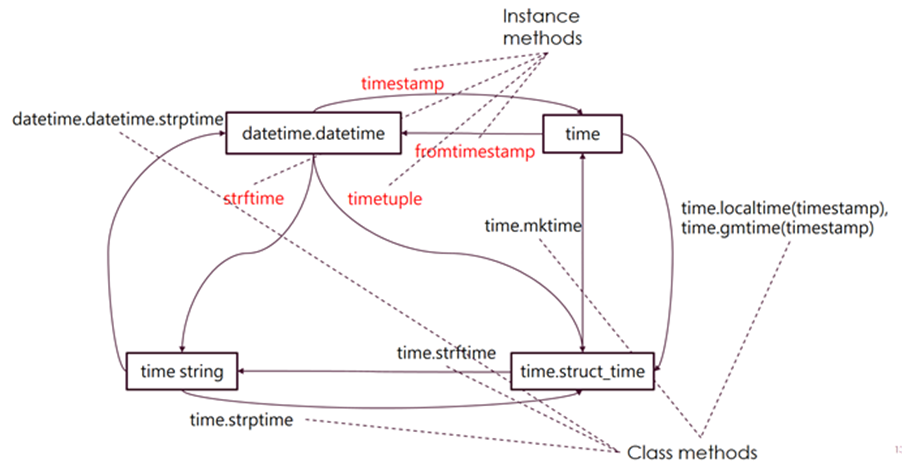

-----
# <span style=color:blue> re Module </span>
https://docs.python.org/3/library/re.html#module-re

+ Regular expressions provide a formal way to express string search patterns.
+ This module provides regular expression matching operations.
  + re.split(pattern, string , flags=0): split string by the occurrence of pattern;
  + re.search(pattern, string , flags=0): search for the first occurrence of pattern in string;
            m=re.search(pattern,string)
            if m:
                process(m)
  + re.match(pattern, string , flags=0): determine if zero or more characters at the beginning of string matches pattern;
  + re.findall(pattern, string , flags=0): find all non-overlapping matches of pattern in string as a list of strings;
  + re.finditer(pattern, string , flags=0): return an iterator iterating over all non-overlapping matches of pattern in string;
  + re.sub(pattern, repl, string, count=0, flags=0): return the string obtained by replacing the non-overlapping occurrences of pattern in string by repl, which can be a string or a function;
  + re.compile(pattern,flags): compile a regular expression pattern into a regular expression object;
  
           import re
           reg = re.compile(pattern)
           reg.XXXX(string)
           
  + re.escape(string): escape all characters in string except ASCII letters, digits, and ‘_’.


#### flags 
Flags | Result
:-----|:-----
re.A, re.ASCII | Make \w, \W, \b, \B, \d, \D, \s and \S perform ASCII-only matching instead of full Unicode matching. 
re.I, re.IGNORECASE | Perform case-insensitive matching; expressions like [A-Z] will match lowercase letters, too. 
re.M, re.MULTILINE| When specified, the pattern character '^' matches at the beginning of the string and at the beginning of each line (immediately following each newline); and the pattern character $'\$'$ matches at the end of the string and at the end of each line (immediately preceding each newline). By default, '^' matches only at the beginning of the string, and '\$' only at the end of the string and immediately before the newline (if any) at the end of the string.
re.S, re.DOTALL | Make the '.' special character match any character at all, including a newline; without this flag, '.' will match anything except a newline. 

In [1]:
import re
re.split(r",", "123,456,789")    # r=>Tell Python that this is a raw string, and Python does not process any \.

['123', '456', '789']

#### Searching a specific string pattern in string by re is simple.

In [3]:
match = re.search(r"Orz", "One Orz, Two Orzs") # Orz is the specific search pattern.
if match: 
    print(match.group(),match.start(),match.end())

Orz 4 7


In [4]:
reg = re.compile(r"Orz")
match = reg.search("One Orz, Two Orzs") # Orz is the specific search pattern.
if match: 
    print(match.group(),match.start(),match.end())

Orz 4 7


#### Specifying a search pattern must follow some grammar rules.
+ Special characters including ! \$ ^ * (  ) + = { } [ ] | \\ : . ? have special meanings in re. Therefore, to match those characters, those characters must be preceded by \\.
+ ^foo matches foo at the beginning of a string
+ foo$ matches foo at the end of a string
+ ab* matches a, ab, abb, abbb, ….
+ ab+ matches ab, abb, abbb, ….
+ ab? matches a and ab
+ <span style=color:red>* + ? are greedy qualifiers; that is, they match as more characters as possible.</span>
      e.g. re.search("<.*>", "<a> b <c>") finds a match <a> b <c> but does not yield the match <a>.
+ <span style=color:red>*? +? ?? are non-greedy qualifiers; that is, they match as few characters as possible.</span>
      e.g. re.search("<.*?>", "<a> b <c>") finds a match <a>.
+ RE1 | RE2 matches either RE1 or RE2.

Pattern | Result | Pattern | Result
:-----|:-----|:-----|:-----
. | Any characters except a newline (re.DOTALL is not set) | *? +? ?? | Non-greedy versions of * + ?
^ | Match the start of string | RE{m} | Match m repetitions of RE
$ | Match the end of string | RE{m,} | Match at least m repetitions of RE
RE* | Match 0 or more repetitions of RE| RE{m,n} | Match m to n repetitions of RE
RE+ | Match at least one repetition of RE | RE{m,n}? | A non-greedy version of {m,n}
RE? | Match 0 or 1 repetition of RE | [] | Indicate a character set

In [18]:
print(re.search(r"<.*>", "<a> b <c>")) # greedy qualifier
print(re.search(r"<.*?>", "<a> b <c>"))# nongreedy version of *

<_sre.SRE_Match object; span=(0, 9), match='<a> b <c>'>
<_sre.SRE_Match object; span=(0, 3), match='<a>'>


#### Patterns for indicating character sets

Pattern | Result | Pattern | Result
:-----|:-----|:-----|:-----
[abc] | a or b or c | [^abc] | All characters except a and b and c
[0-9] |0 to 9 |  \d | [0-9]
[^0-9]| All characters except 0 to 9 | \D | [^0-9]
[0-9a-z] [0-9[a-z]] | 0 to 9 or a to z | \w | [0-9a-zA-Z]
[0-9&&[^12]] | 0 3 to 9 | \W | [^\w]
\s | Space characters [\t\n\x0B\f\r] | \S | All characters except space characters [^\s]

#### <span style=color:red>Useful patterns for indicating numbers</span>
+ <span style=color:red>RE for integer numbers: [+-]?\d+</span>
+ <span style=color:red>RE for floating numbers:[+-]?(\d+(\.?\d*)|\.\d+)</span>
+ <span style=color:red>RE for scientific notation:[+-]?(\d+(\.?\d*) |\.\d+)([eE][+-]?\d+)?</span>

In [14]:
# Use re to check if string is a valid integer number
string ='abc'
if re.match(r"[+-]?\d+", string) is None:
    print('invalid number')
            
# Use exception-handling to check if string is a valid integer number
try:
    int(string)
except ValueError:
    print('invalid number')

invalid number
invalid number


## <span style=color:blue> Match groups </span>
Pattern | Result
:-----|:----
\b | Match the empty string when it is at the beginning or end of a word
\B | Match the empty string when it is not at the beginning or end of a word
\number | Match the content of the group of the same number
(?P$<name>$...) | This group can be identified by name

####  ( ... ) indicates the start and end of a group

In [37]:
m = re.match(r"(\d+)\.(\d+)", "24.1632")
print(m.group())
print(m.group(0))
print(m.group(1))
print(m.group(2))

24.1632
24.1632
24
1632


#### <span style=color:red> Example of using \b:  r'\bOrz\b' matches (Orz), 'Orz', abc Orz def but does not match OrzOrz, 123Orz, Orz123. </span>

In [38]:
import re
reg = re.compile(r'\bOrz\b')
for m in reg.finditer("(Orz) 'Orz' abc Orz def OrzOrz  123Orz123  456Orz123"):
    print('\\b=>',m.group(),m.start(),m.end())
    
reg2 = re.compile(r'\BOrz\B')
for m in reg2.finditer("(Orz) 'Orz' abc Orz def OrzOrz  123Orz123  456Orz123"):
    print('\\B=>',m.group(),m.start(),m.end())    
  

\b=> Orz 1 4
\b=> Orz 7 10
\b=> Orz 16 19
\B=> Orz 35 38
\B=> Orz 46 49


#### Example of using \number
##### 1. r'(\d\d)(\d\d\d)\2'
   + (\d\d): group 1 requires 2 digits
   + (\d\d\d): group 2 requires 3 digits
   + \2 indicates this pattern must be identical to group 2 
   
##### <span style=color:red>2. using \number for matching a pair of " and " or a pair of ' and '.</span>   

In [40]:
print(re.search(r'([\'\"]).*\1','"1234"'))
print(re.search(r'([\'\"]).*\1','"1234\''))

<_sre.SRE_Match object; span=(0, 6), match='"1234"'>
None


Pattern | Result
:----|:----
(?:...) | Matches … but the substring matched by the group cannot be retrieved or referenced.
(?!...) | Matches if a match for … does not match next
(?<=...) | Matches if the current position in the string is preceded by a match for …
(?<!...) | Matches if the current position in the string is not preceded by a match for …
(?(id/name)yes-pattern$|$no_pattern) | If group \id exists, apply yes-pattern; otherwise, apply no-pattern

In [30]:
import re
m = re.search('(?:a{2})c(.*)', 'aaaaccccdef')
print(m.group(0),m.group(1))
m = re.search('(?!a{2})(.*)', 'aaaaacccdef')
print(m.group(0),m.group(1))
m = re.search('(?<=abc)def', 'abcdef')
print(m.group(0) if m is not None else None)
m = re.search('(?<=abc)def', 'abddef')
print(m.group(0) if m is not None else None)
m = re.search('(?<=-)\w+', 'spam-egg')
print(m.group(0) if m is not None else None)

aaccccdef cccdef
acccdef acccdef
def
None
egg


####  <span style=color:red>Example of match groups: $(<)?(\w+@\w+(?:\.\w+)+)(?(1)>|\$)$</span>

+ group 1: (<)? The first group indicates that the first character of a match can be either a '<' or empty
+ group 2: $(\w+@\w+(?:\.\w+)+)$
+ group 3: $(?:\.\w+)+$ group 3 cannot be referred 
+ $ If the first character of this match is a '<', the last character of this match must be a '>'; otherwise, this match must be at the end of string

In [70]:
m = re.search(r'(<)?(\w+@\w+(?:\.\w+)+)(?(1)>|$)', 'user@mail.com')
print(m,m.group(1),m.group(2))
m = re.search(r'(<)?(\w+@\w+(\.\w+)+)(?(1)>|$)', 'user@mail.com') # (group 3 returns only the last match)
print(m,m.group(1),m.group(2),m.group(3))
m = re.search(r'(<)?(\w+@\w+(?:\.\w+)+)(?(1)>|$)', '<user@mail.com>')
print(m,m.group(1),m.group(2))
m = re.search(r'(<)?(\w+@\w+(?:\.\w+)+)(?(1)>|$)', '<user@mail.com')
print(m,m.group(1),m.group(2))
m = re.search(r'(<)?(\w+@\w+(?:\.\w+)+)(?(1)>|$)', '<user@mail.com ')
print(m)
m = re.search(r'(<)?(\w+@\w+(?:\.\w+)+)(?(1)>|$)', '<user@mail.com<')
print(m)

<_sre.SRE_Match object; span=(0, 13), match='user@mail.com'> None user@mail.com
<_sre.SRE_Match object; span=(0, 13), match='user@mail.com'> None user@mail.com .com
<_sre.SRE_Match object; span=(0, 15), match='<user@mail.com>'> < user@mail.com
<_sre.SRE_Match object; span=(1, 14), match='user@mail.com'> None user@mail.com
None
None


## <span style=color:blue> search() vs match() </span>
#### re.match() checks for a match at the beginning of string, whereas re.search() finds a match anywhere in string.

In [13]:
import re
mo1 = re.match("c", "abcdef")
mo2 = re.search("c", "abcdef")
print(mo1.span() if mo1 is not None else None)    # No match
print(mo2.span() if mo2 is not None else None)   # Match

None
(2, 3)


#### Use ^ to force re.search() to find the match at the beginning of string.

In [23]:
import re
print(re.search("^c", "abcdef")) # No match 
print(re.search("^a", "abcdef")) # Match

None
<_sre.SRE_Match object; span=(0, 1), match='a'>


+ In MULTILINE mode (flags=re.MULTILINE), match() only matches at the beginning of the string, whereas search() with a regular expression beginning with '^' will match at the beginning of each line.

In [24]:
import re
print(re.match('X', 'A\nB\nX', re.MULTILINE))  # No match
print(re.search('^X', 'A\nB\nX', re.MULTILINE))  # Match

None
<_sre.SRE_Match object; span=(4, 5), match='X'>


## <span style=color:blue> findall() vs finditer() </span>
#### findall() finds all match groups and saves them in a list.

In [1]:
import re
print(re.findall(r"12","121234345656"))
print(re.findall(r"(\d\d)\1","121234345656"))
print(re.findall(r"([\'\"])[^\'\"]*\1",'''Hello "Mike", 'John', "Mary"'''))

['12', '12']
['12', '34', '56']
['"', "'", '"']


#### Use finditer() to obtain each match iteratively.
        reg = re.compile(pattern)
        for m in reg.finditer(string):
            print(m.group(),m.start(),m.end()) 

In [27]:
import re
reg = re.compile(r"12")
for m in reg.finditer("121234345656"):
    print(m.group(),m.start(),m.end())

12 0 2
12 2 4


In [28]:
reg = re.compile(r"(\d\d)\1")
for m in reg.finditer("121234345656"):
    print(m.group(),m.start(),m.end())

1212 0 4
3434 4 8
5656 8 12


In [29]:
reg = re.compile(r"([\'\"])[^\'\"]*\1")
for m in reg.finditer('''Hello "Mike", 'John', "Mary"'''):
    print(m.group(),m.start(),m.end())

"Mike" 6 12
'John' 14 20
"Mary" 22 28


## <span style=color:blue> Match Objects </span>
m[g] is equal to m.string[m.start(g):m.end(g)]

In [69]:
m = re.match(r"(\w+) (\w+)", "Isaac Newton, physicist")
print(m.group(0)) #The entire match or m[0]
print(m.group(1)) # The first parenthesized subgroup. Or m[1]
print(m.group(2)) # The second parenthesized subgroup. Or m[2]
print(m.group(1,2)) # Multiple arguments give us a tuple.

Isaac Newton
Isaac
Newton
('Isaac', 'Newton')


In [66]:
m = re.match(r"(?P<first_name>\w+) (?P<last_name>\w+)", "Malcolm Reynolds")
print('first name:{}, last name:{}'.format(m.group('first_name'),m.group('last_name')))

first name:Malcolm, last name:Reynolds


In [71]:
m = re.match(r"(..)+", "a1b2c3")  # Matches 3 times.
print(m.group(1))    # Returns only the last match.
print(m.group(0)) 

c3
a1b2c3


## <span style=color:blue> Match Groups=>Dictionary </span>
groupdict() is very useful to save match groups in a dictionary.

In [73]:
m = re.match(r"(?P<first_name>\w+) (?P<last_name>\w+)", "Malcolm Reynolds")
print(m.group('first_name'),m.group('last_name'))
d = m.groupdict()
print(d)

Malcolm Reynolds
{'first_name': 'Malcolm', 'last_name': 'Reynolds'}


## <span style=color:blue> More Advanced Examples </span>
https://docs.python.org/3/library/re.html
+ 6.2.5.4. Making a Phonebook
+ 6.2.5.5. Text Munging
+ 6.2.5.9. Writing a Tokenizer 

----
# <span style=color:blue> Miscellaneous operating system interfaces: os Module </span>
https://docs.python.org/3/library/os.html
+ os.path is often used to manipulate the names of paths.
      import os.path
+ os.path.abspath(path) returns the absolute path of pathname path.
+ os.path.basename(path) returns the base name of pathname path.
      os.path.basename('C:\\Python\\Source')
+ os.path.dirname(path)
+ os.path.getatime(path) gets the last access time of pathname path.
  + getmtime, getctime
+ os.path.getsize(path) gets the size in bytes of path.
+ os.path.isfile(path), os.path.isdir(path)
+ os.path.exists(path) returns True if path exists;
+ os.path.join(path,*paths) joins one or more path components.
      os.path.join("c:\\Python","A","B")
+ os.path.split(path) splits pathname into (head,tail), where tail is the last pathname component.
      os.path.split(os.path.join("c:\\Python","A","B"))

In [76]:
import os.path
print(os.path.basename('C:\\Python\\Source'))

Source


In [77]:
print(os.path.dirname('C:\\Python\\Source'))

C:\Python


In [83]:
os.path.join("c:\\Python","A","B","C")

'c:\\Python\\A\\B\\C'

In [84]:
os.path.split(os.path.join("c:\\Python","A","B","C"))

('c:\\Python\\A\\B', 'C')

+ os.chdir(path) changes the current working directory to path.
+ os.getcwd() gets the current working directory.
+ os.listdir(directory) gets <span style=color:red>a list of the file and subdirectory in directory.</span>
      e.g., os.listdir(os.getcwd()) gets a list of files and subdirectories in the current working directory.
+ os.scandir(directory) can get the file and subdirectory in directory iteratively.

       for entry in os.scandir(directory):
           if entry.is_file():
               print(entry.name)
           elif entry.is_dir():
               print(entry.name)

  + if you want to traverse the directory tree, os.scandir() must be applied recursively.
  + os.listdir(directory) is equivalent to [entry.name for entry in os.scandir(directory)]
+ os.walk() can directly walk the directory tree either top-down or bottom-up.
+ os.mkdir(path) creates a directory named path.
+ os.rename(oldname, newname) renames the file or directory oldname to newname.
+ os.rmdir(path) and os.remove(file) delete the directory path and the file file, respectively.

In [20]:
import os
import datetime, time
try:
    system_path = os.environ['SystemRoot']
    for entry in os.scandir(system_path):
        name = os.path.join(system_path,entry.name)
        if entry.is_file():
            print('{:<40s} {} {:10d}'.format(entry.name,datetime.datetime.fromtimestamp(os.path.getatime(name)),os.path.getsize(name)))
        elif entry.is_dir():
            print('{:<40s} {}'.format('<{}>'.format(entry.name),datetime.datetime.fromtimestamp(os.path.getatime(name))))
except KeyError:
    print(os.environ.items()) 

<addins>                                 2018-04-12 07:38:24.548098
<appcompat>                              2018-06-19 18:56:08.258781
<apppatch>                               2018-09-15 22:03:37.554408
<AppReadiness>                           2018-09-26 07:42:15.596370
<assembly>                               2018-06-19 19:40:53.461080
<bcastdvr>                               2018-09-15 22:03:37.570029
bfsvc.exe                                2018-04-12 07:34:02.785592      67072
<BitLockerDiscoveryVolumeContents>       2018-04-13 00:00:33.628716
<Boot>                                   2018-04-12 07:38:21.016555
bootstat.dat                             2018-06-19 00:35:46.586463      67584
<Branding>                               2018-04-12 07:38:21.016555
<CbsTemp>                                2018-09-15 21:07:51.777938
<Containers>                             2018-06-19 19:26:48.120051
<CSC>                                    2018-06-19 00:39:53.248375
<Cursors>                 

### os.walk(directory, topdown=True, onerror=None, followlinks=False)
os.path https://docs.python.org/3/library/os.path.html#module-os.path

os.walk() returns an iterator and yields a 3-tuple (dirpath, dirnames, filenames).
+ dirpath is the path to the directory;
+ dirnames is a list of the names of the subdirectories in dirpath;
+ filename is a list of the names of the ordinary files in dirpath.
+ if topdown=False, the triple for a directory is generated after the triples for all of its subdirectories are listed before 

In [2]:
import os
from os.path import join, getsize, getatime, getmtime, getctime

for root, dirs, files in os.walk(os.environ['SystemRoot'],topdown=True):
    print(root, "consumes", end=" ")
    print(sum(getsize(join(root, name)) for name in files), end=" ")
    print("bytes in", len(files), "non-directory files")
    for x in ['Boot', 'assembly', 'inf', 'Installer', 'System', 'System32', 'SysWOW64', 'winsxs']:
        if x in dirs:
            dirs.remove(x)  #because remove those from dirs in-place, os.walk don't visit those directories

C:\Windows consumes 7022880 bytes in 33 non-directory files
C:\Windows\addins consumes 802 bytes in 1 non-directory files
C:\Windows\appcompat consumes 0 bytes in 0 non-directory files
C:\Windows\appcompat\appraiser consumes 7174483 bytes in 3 non-directory files
C:\Windows\appcompat\appraiser\AltData consumes 0 bytes in 0 non-directory files
C:\Windows\appcompat\appraiser\Telemetry consumes 0 bytes in 0 non-directory files
C:\Windows\appcompat\UA consumes 3043 bytes in 3 non-directory files
C:\Windows\apppatch consumes 7948086 bytes in 6 non-directory files
C:\Windows\apppatch\AppPatch64 consumes 0 bytes in 0 non-directory files
C:\Windows\apppatch\Custom consumes 0 bytes in 0 non-directory files
C:\Windows\apppatch\Custom\Custom64 consumes 0 bytes in 0 non-directory files
C:\Windows\apppatch\CustomSDB consumes 0 bytes in 0 non-directory files
C:\Windows\apppatch\en-US consumes 317952 bytes in 1 non-directory files
C:\Windows\apppatch\zh-TW consumes 180224 bytes in 1 non-directory fil

C:\Windows\ImmersiveControlPanel\SystemSettings\Assets consumes 0 bytes in 0 non-directory files
C:\Windows\ImmersiveControlPanel\SystemSettings\View consumes 0 bytes in 0 non-directory files
C:\Windows\ImmersiveControlPanel\zh-TW consumes 4096 bytes in 1 non-directory files
C:\Windows\INF consumes 49858585 bytes in 950 non-directory files
C:\Windows\INF\.NET CLR Data consumes 55059 bytes in 2 non-directory files
C:\Windows\INF\.NET CLR Data\0000 consumes 36 bytes in 1 non-directory files
C:\Windows\INF\.NET CLR Data\0404 consumes 36 bytes in 1 non-directory files
C:\Windows\INF\.NET CLR Networking consumes 53639 bytes in 2 non-directory files
C:\Windows\INF\.NET CLR Networking\0000 consumes 45 bytes in 1 non-directory files
C:\Windows\INF\.NET CLR Networking\0404 consumes 45 bytes in 1 non-directory files
C:\Windows\INF\.NET CLR Networking 4.0.0.0 consumes 167501 bytes in 2 non-directory files
C:\Windows\INF\.NET CLR Networking 4.0.0.0\0000 consumes 42 bytes in 1 non-directory files
C

C:\Windows\Microsoft.NET\Framework\v4.0.30319 consumes 123220256 bytes in 391 non-directory files
C:\Windows\Microsoft.NET\Framework\v4.0.30319\1028 consumes 893666 bytes in 11 non-directory files
C:\Windows\Microsoft.NET\Framework\v4.0.30319\1033 consumes 831648 bytes in 6 non-directory files
C:\Windows\Microsoft.NET\Framework\v4.0.30319\ASP.NETWebAdminFiles consumes 92525 bytes in 19 non-directory files
C:\Windows\Microsoft.NET\Framework\v4.0.30319\ASP.NETWebAdminFiles\AppConfig consumes 83734 bytes in 8 non-directory files
C:\Windows\Microsoft.NET\Framework\v4.0.30319\ASP.NETWebAdminFiles\AppConfig\App_LocalResources consumes 38915 bytes in 16 non-directory files
C:\Windows\Microsoft.NET\Framework\v4.0.30319\ASP.NETWebAdminFiles\App_Code consumes 58608 bytes in 7 non-directory files
C:\Windows\Microsoft.NET\Framework\v4.0.30319\ASP.NETWebAdminFiles\App_Data consumes 317 bytes in 1 non-directory files
C:\Windows\Microsoft.NET\Framework\v4.0.30319\ASP.NETWebAdminFiles\App_GlobalResour

C:\Windows\PolicyDefinitions consumes 3708809 bytes in 204 non-directory files
C:\Windows\PolicyDefinitions\en-US consumes 2807179 bytes in 204 non-directory files
C:\Windows\PolicyDefinitions\zh-TW consumes 2638669 bytes in 204 non-directory files
C:\Windows\PrintDialog consumes 1953115 bytes in 6 non-directory files
C:\Windows\PrintDialog\Assets consumes 7707 bytes in 3 non-directory files
C:\Windows\PrintDialog\en-US consumes 2560 bytes in 1 non-directory files
C:\Windows\PrintDialog\microsoft.system.package.metadata consumes 0 bytes in 0 non-directory files
C:\Windows\PrintDialog\microsoft.system.package.metadata\Autogen consumes 4 bytes in 1 non-directory files
C:\Windows\PrintDialog\pris consumes 1632 bytes in 1 non-directory files
C:\Windows\Provisioning consumes 2637132 bytes in 5 non-directory files
C:\Windows\Provisioning\Cosa consumes 0 bytes in 0 non-directory files
C:\Windows\Provisioning\Cosa\Microsoft consumes 2511890 bytes in 1 non-directory files
C:\Windows\Provisionin

C:\Windows\servicing\Packages consumes 86307734 bytes in 7618 non-directory files
C:\Windows\servicing\Packages\FodMetadata consumes 87037 bytes in 1 non-directory files
C:\Windows\servicing\Packages\FodMetadata\metadata consumes 2508403 bytes in 302 non-directory files
C:\Windows\servicing\Sessions consumes 44148182 bytes in 15 non-directory files
C:\Windows\servicing\SQM consumes 0 bytes in 0 non-directory files
C:\Windows\servicing\Version consumes 0 bytes in 0 non-directory files
C:\Windows\servicing\Version\10.0.17134.400 consumes 18 bytes in 2 non-directory files
C:\Windows\servicing\zh-TW consumes 16896 bytes in 2 non-directory files
C:\Windows\Setup consumes 0 bytes in 0 non-directory files
C:\Windows\Setup\State consumes 42 bytes in 1 non-directory files
C:\Windows\ShellComponents consumes 6442496 bytes in 3 non-directory files
C:\Windows\ShellExperiences consumes 53632512 bytes in 27 non-directory files
C:\Windows\SHELLNEW consumes 6233 bytes in 1 non-directory files
C:\Windo

C:\Windows\SoftwareDistribution\Download\5c33a7c7f8a79f8716ba1b66346308f1\Package_for_RollupFix~~amd64~~17134.407.1.6\wow64_microsoft-windows-a..ence-mitigations-c3_31bf3856ad364e35_10.0.17134.376_none_f803c6357cd588b9 consumes 0 bytes in 0 non-directory files
C:\Windows\SoftwareDistribution\Download\5c33a7c7f8a79f8716ba1b66346308f1\Package_for_RollupFix~~amd64~~17134.407.1.6\wow64_microsoft-windows-appmanagement-appvwow_31bf3856ad364e35_10.0.17134.376_none_9f1959bf7cf1af61 consumes 0 bytes in 0 non-directory files
C:\Windows\SoftwareDistribution\Download\5c33a7c7f8a79f8716ba1b66346308f1\Package_for_RollupFix~~amd64~~17134.407.1.6\wow64_microsoft-windows-appx-alluserstore_31bf3856ad364e35_10.0.17134.376_none_0fb5f72e827f0ac9 consumes 0 bytes in 0 non-directory files
C:\Windows\SoftwareDistribution\Download\5c33a7c7f8a79f8716ba1b66346308f1\Package_for_RollupFix~~amd64~~17134.407.1.6\wow64_microsoft-windows-audio-audiocore_31bf3856ad364e35_10.0.17134.407_none_62cc03426ef0fcff consumes 0 

C:\Windows\SystemApps\Microsoft.AAD.BrokerPlugin_cw5n1h2txyewy consumes 3907427 bytes in 12 non-directory files
C:\Windows\SystemApps\Microsoft.AAD.BrokerPlugin_cw5n1h2txyewy\Assets consumes 30948 bytes in 20 non-directory files
C:\Windows\SystemApps\Microsoft.AAD.BrokerPlugin_cw5n1h2txyewy\css consumes 409015 bytes in 2 non-directory files
C:\Windows\SystemApps\Microsoft.AAD.BrokerPlugin_cw5n1h2txyewy\microsoft.system.package.metadata consumes 0 bytes in 0 non-directory files
C:\Windows\SystemApps\Microsoft.AAD.BrokerPlugin_cw5n1h2txyewy\microsoft.system.package.metadata\Autogen consumes 4 bytes in 1 non-directory files
C:\Windows\SystemApps\Microsoft.AAD.BrokerPlugin_cw5n1h2txyewy\pris consumes 4416 bytes in 2 non-directory files
C:\Windows\SystemApps\Microsoft.AccountsControl_cw5n1h2txyewy consumes 5567776 bytes in 6 non-directory files
C:\Windows\SystemApps\Microsoft.AccountsControl_cw5n1h2txyewy\Assets consumes 46388 bytes in 12 non-directory files
C:\Windows\SystemApps\Microsoft.

C:\Windows\SystemApps\Microsoft.Windows.CloudExperienceHost_cw5n1h2txyewy\core\js consumes 54784 bytes in 16 non-directory files
C:\Windows\SystemApps\Microsoft.Windows.CloudExperienceHost_cw5n1h2txyewy\core\js\appLaunchers consumes 30969 bytes in 11 non-directory files
C:\Windows\SystemApps\Microsoft.Windows.CloudExperienceHost_cw5n1h2txyewy\core\view consumes 8572 bytes in 12 non-directory files
C:\Windows\SystemApps\Microsoft.Windows.CloudExperienceHost_cw5n1h2txyewy\css consumes 459559 bytes in 12 non-directory files
C:\Windows\SystemApps\Microsoft.Windows.CloudExperienceHost_cw5n1h2txyewy\data consumes 2102 bytes in 1 non-directory files
C:\Windows\SystemApps\Microsoft.Windows.CloudExperienceHost_cw5n1h2txyewy\data\int consumes 100819 bytes in 2 non-directory files
C:\Windows\SystemApps\Microsoft.Windows.CloudExperienceHost_cw5n1h2txyewy\data\prod consumes 101250 bytes in 2 non-directory files
C:\Windows\SystemApps\Microsoft.Windows.CloudExperienceHost_cw5n1h2txyewy\fonts consumes

C:\Windows\SystemApps\Microsoft.Windows.Cortana_cw5n1h2txyewy\Grammar\4009 consumes 222321 bytes in 20 non-directory files
C:\Windows\SystemApps\Microsoft.Windows.Cortana_cw5n1h2txyewy\Microsoft.Bing.Client.Graph consumes 3471 bytes in 1 non-directory files
C:\Windows\SystemApps\Microsoft.Windows.Cortana_cw5n1h2txyewy\microsoft.system.package.metadata consumes 0 bytes in 0 non-directory files
C:\Windows\SystemApps\Microsoft.Windows.Cortana_cw5n1h2txyewy\microsoft.system.package.metadata\Autogen consumes 4 bytes in 1 non-directory files
C:\Windows\SystemApps\Microsoft.Windows.Cortana_cw5n1h2txyewy\pris consumes 277016 bytes in 2 non-directory files
C:\Windows\SystemApps\Microsoft.Windows.Cortana_cw5n1h2txyewy\Rules consumes 176591 bytes in 1 non-directory files
C:\Windows\SystemApps\Microsoft.Windows.Cortana_cw5n1h2txyewy\speech consumes 0 bytes in 0 non-directory files
C:\Windows\SystemApps\Microsoft.Windows.Cortana_cw5n1h2txyewy\speech\0407 consumes 1428 bytes in 1 non-directory files

C:\Windows\WinSxS consumes 75792 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_1394.inf.resources_31bf3856ad364e35_10.0.17134.1_en-us_483b7a088b09fd82 consumes 16190 bytes in 2 non-directory files
C:\Windows\WinSxS\amd64_1394.inf.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_abbe21cc6f9cb404 consumes 16190 bytes in 2 non-directory files
C:\Windows\WinSxS\amd64_3ware.inf.resources_31bf3856ad364e35_10.0.17134.1_en-us_2b03414e54016eeb consumes 1128 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_3ware.inf.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_8e85e9123894256d consumes 1128 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_61883.inf.resources_31bf3856ad364e35_10.0.17134.1_en-us_1b7db86b16bff893 consumes 708 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_61883.inf.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_7f00602efb52af15 consumes 668 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_acpi.inf.resources_31bf3856ad364e35_10.0.17134.1_en-us_99336b2

C:\Windows\WinSxS\amd64_dual_battery.inf_31bf3856ad364e35_10.0.17134.1_none_0525821c2754c16b consumes 43526 bytes in 2 non-directory files
C:\Windows\WinSxS\amd64_dual_bcmdhd64.inf_31bf3856ad364e35_10.0.17134.1_none_ebdc4e0c7a4be956 consumes 1662495 bytes in 5 non-directory files
C:\Windows\WinSxS\amd64_dual_bcmfn2.inf_31bf3856ad364e35_10.0.17134.1_none_e9d9a186a70debba consumes 13494 bytes in 2 non-directory files
C:\Windows\WinSxS\amd64_dual_bcmwdidhdpcie.inf_31bf3856ad364e35_10.0.17134.1_none_9b720ab5dc8a9557 consumes 2236098 bytes in 4 non-directory files
C:\Windows\WinSxS\amd64_dual_bda.inf_31bf3856ad364e35_10.0.17134.1_none_655162a159af3e59 consumes 29404 bytes in 2 non-directory files
C:\Windows\WinSxS\amd64_dual_bth.inf_31bf3856ad364e35_10.0.17134.1_none_3fbe3156e880ea28 consumes 1386770 bytes in 5 non-directory files
C:\Windows\WinSxS\amd64_dual_bth.inf_31bf3856ad364e35_10.0.17134.320_none_3bf89604d55d88c2 consumes 1414422 bytes in 5 non-directory files
C:\Windows\WinSxS\amd64

C:\Windows\WinSxS\amd64_dual_mdmgl009.inf_31bf3856ad364e35_10.0.17134.1_none_584baa62450363b4 consumes 216596 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_dual_mdmgl010.inf_31bf3856ad364e35_10.0.17134.1_none_e734356a1e0bdf26 consumes 126054 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_dual_mdmgsm.inf_31bf3856ad364e35_10.0.17134.1_none_3ccbb0d1e5b077c9 consumes 38968 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_dual_mdmhaeu.inf_31bf3856ad364e35_10.0.17134.1_none_56c198207bf8efab consumes 5028 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_dual_mdmhandy.inf_31bf3856ad364e35_10.0.17134.1_none_a28f08e726194138 consumes 66028 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_dual_mdmhay2.inf_31bf3856ad364e35_10.0.17134.1_none_bf3a774d3fcca65c consumes 100404 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_dual_mdmhayes.inf_31bf3856ad364e35_10.0.17134.1_none_a0443cd0b3224b0c consumes 144846 bytes in 1 non-directory files
C:\Windows\WinSxS\amd

C:\Windows\WinSxS\amd64_dual_prnhpcl1.inf_31bf3856ad364e35_10.0.17134.1_none_44cc5b011bfb70d4\amd64 consumes 8987608 bytes in 51 non-directory files
C:\Windows\WinSxS\amd64_dual_prnhpcl2.inf_31bf3856ad364e35_10.0.17134.1_none_6dde312294e169d3 consumes 36453 bytes in 2 non-directory files
C:\Windows\WinSxS\amd64_dual_prnhpcl2.inf_31bf3856ad364e35_10.0.17134.1_none_6dde312294e169d3\amd64 consumes 170884 bytes in 7 non-directory files
C:\Windows\WinSxS\amd64_dual_prnhpcl3.inf_31bf3856ad364e35_10.0.17134.1_none_96f007440dc762d2 consumes 97795 bytes in 2 non-directory files
C:\Windows\WinSxS\amd64_dual_prnhpcl3.inf_31bf3856ad364e35_10.0.17134.1_none_96f007440dc762d2\amd64 consumes 1427864 bytes in 25 non-directory files
C:\Windows\WinSxS\amd64_dual_prnhpcl4.inf_31bf3856ad364e35_10.0.17134.1_none_c001dd6586ad5bd1 consumes 22130 bytes in 2 non-directory files
C:\Windows\WinSxS\amd64_dual_prnhpcl4.inf_31bf3856ad364e35_10.0.17134.1_none_c001dd6586ad5bd1\amd64 consumes 262564 bytes in 15 non-dir

C:\Windows\WinSxS\amd64_fdwsd_31bf3856ad364e35_10.0.17134.1_none_63290fcb2b503e7f consumes 150160 bytes in 2 non-directory files
C:\Windows\WinSxS\amd64_flpydisk.inf.resources_31bf3856ad364e35_10.0.17134.1_en-us_f984ccf56ae89119 consumes 660 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_flpydisk.inf.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_5d0774b94f7b479b consumes 516 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_fundisc.resources_31bf3856ad364e35_10.0.17134.1_en-us_c3b7ffee25e383a4 consumes 11264 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_fundisc.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_273aa7b20a763a26 consumes 9728 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_fundisc_31bf3856ad364e35_10.0.17134.1_none_6164fb2fa40cf63f consumes 150718 bytes in 2 non-directory files
C:\Windows\WinSxS\amd64_fusionv2.inf.resources_31bf3856ad364e35_10.0.17134.1_en-us_2e30b784eb9ec277 consumes 802 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_fus

C:\Windows\WinSxS\amd64_microsoft-hyper-v-3dvideo_31bf3856ad364e35_10.0.17134.1_none_bb0455987cc9b004 consumes 356864 bytes in 2 non-directory files
C:\Windows\WinSxS\amd64_microsoft-hyper-v-3dvideo_31bf3856ad364e35_10.0.17134.345_none_b72e1be069b20533 consumes 340992 bytes in 2 non-directory files
C:\Windows\WinSxS\amd64_microsoft-hyper-v-bpa.resources_31bf3856ad364e35_10.0.17134.1_en-us_461210c45e54cb44 consumes 153282 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-hyper-v-bpa.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_a994b88842e781c6 consumes 66760 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-hyper-v-bpa_31bf3856ad364e35_10.0.17134.1_none_84e0eedae46f7b9b consumes 47882 bytes in 4 non-directory files
C:\Windows\WinSxS\amd64_microsoft-hyper-v-d..-netsetup.resources_31bf3856ad364e35_10.0.17134.1_en-us_592a4468e416a24d consumes 98816 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-hyper-v-d..s-vmswitch-netsetup_31bf3856ad364e35

C:\Windows\WinSxS\amd64_microsoft-windows-a..-uevagent.resources_31bf3856ad364e35_10.0.17134.1_en-us_8582f1278cc010bf consumes 62976 bytes in 2 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-a..-uevagent.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_e90598eb7152c741 consumes 29696 bytes in 2 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-a...appxmain.resources_31bf3856ad364e35_10.0.17134.1_en-us_040f21b7c1a36030 consumes 21584 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-a...appxmain.resources_31bf3856ad364e35_10.0.17134.1_en-us_1c1b43abdb17d6d7 consumes 1880 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-a...appxmain.resources_31bf3856ad364e35_10.0.17134.1_en-us_62fd298345466ed1 consumes 1408 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-a...appxmain.resources_31bf3856ad364e35_10.0.17134.1_en-us_668f105bc6338436 consumes 3088 bytes in 1 non-directory files
C:\Windows\WinSxS\a

C:\Windows\WinSxS\amd64_microsoft-windows-appidcore_31bf3856ad364e35_10.0.17134.1_none_145165e81f8f518b consumes 738720 bytes in 5 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-appid_31bf3856ad364e35_10.0.17134.1_none_3ccc9ca31b51b1f0 consumes 321192 bytes in 4 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-appmanagement-appv-adm_31bf3856ad364e35_10.0.17134.1_none_1bbb1a9538924f85 consumes 34844 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-appmanagement-appvcsp_31bf3856ad364e35_10.0.17134.1_none_8fa98751616b8ee4 consumes 91136 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-appmanagement-appvwow_31bf3856ad364e35_10.0.17134.1_none_98ba589f5b912b0d consumes 2526200 bytes in 5 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-appmanagement-appvwow_31bf3856ad364e35_10.0.17134.320_none_94f4bd4d486dc9a7 consumes 2526864 bytes in 5 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-appma

C:\Windows\WinSxS\amd64_microsoft-windows-bluescreendiagnostic_31bf3856ad364e35_10.0.17134.1_none_01d1b25bfb093c03 consumes 110186 bytes in 20 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-bluetooth-mtpenum_31bf3856ad364e35_10.0.17134.1_none_e80226d960f1f3f5 consumes 2626 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-bluetoothdiagnostic_31bf3856ad364e35_10.0.17134.1_none_7f3712ffb6401339 consumes 68416 bytes in 17 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-bluetoothdiagnostic_31bf3856ad364e35_10.0.17134.376_none_7b4169cda33fd592 consumes 144624 bytes in 19 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-bluetoothpanapi_31bf3856ad364e35_10.0.17134.1_none_c80534bcb0acf035 consumes 31232 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-bootconfig.resources_31bf3856ad364e35_10.0.17134.1_en-us_aa64e5cc2ca9ccc5 consumes 88576 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-win

C:\Windows\WinSxS\amd64_microsoft-windows-c..rammar.4009.cortana_31bf3856ad364e35_10.0.17134.1_none_9cd424fa91cdc732 consumes 222321 bytes in 20 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-c..rdefaults.resources_31bf3856ad364e35_10.0.17134.1_en-us_96a5a74bc49007aa consumes 3072 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-c..rdefaults.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_fa284f0fa922be2c consumes 2560 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-c..registrar.resources_31bf3856ad364e35_10.0.17134.1_en-us_c925f895c92267bf consumes 5632 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-c..registrar.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_2ca8a059adb51e41 consumes 4608 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-c..reservice.resources_31bf3856ad364e35_10.0.17134.1_en-us_656513c56b442a78 consumes 2560 bytes in 1 non-directory files
C:\Windows\WinSxS\am

C:\Windows\WinSxS\amd64_microsoft-windows-c..uicomponents-events_31bf3856ad364e35_10.0.17134.1_none_95410f69d7c90e17 consumes 153088 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-c..urces-applicability_31bf3856ad364e35_10.0.17134.1_none_1a0df4a54af95919 consumes 223232 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-c..urepicker.appxsetup_31bf3856ad364e35_10.0.17134.1_none_97c293b8a730e370 consumes 10431 bytes in 3 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-c..us-dtc-vistasp1.res_31bf3856ad364e35_10.0.17134.1_none_f7c720586b1adcab consumes 22528 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-c..us-runtime-stclient_31bf3856ad364e35_10.0.17134.1_none_8f0ed338ce3864a5 consumes 64000 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-c..utermanagerlauncher_31bf3856ad364e35_10.0.17134.1_none_7395feeb5d7c8b5c consumes 90112 bytes in 1 non-directory files
C:\Windows\WinSxS\am

C:\Windows\WinSxS\amd64_microsoft-windows-coreuicomponents_31bf3856ad364e35_10.0.17134.112_none_25728ae093c856f0 consumes 3283408 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-coreuicomponents_31bf3856ad364e35_10.0.17134.1_none_292b597ea6f59be7 consumes 3283400 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-coreuicomponents_31bf3856ad364e35_10.0.17134.376_none_2535b04c93f55e40 consumes 3283512 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-coreusermodepnp_31bf3856ad364e35_10.0.17134.1_none_5c82378d96165eef consumes 174289 bytes in 3 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-core_tools_31bf3856ad364e35_10.0.17134.1_none_f18aac7b20bba247 consumes 9728 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-corruptedfilerecovery_31bf3856ad364e35_10.0.17134.1_none_6d3a443791f1b44f consumes 56320 bytes in 2 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-cortana-

C:\Windows\WinSxS\amd64_microsoft-windows-d..gement-dmwappushsvc_31bf3856ad364e35_10.0.17134.1_none_35307933eb474377 consumes 57856 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-d..gement-mdmevaluator_31bf3856ad364e35_10.0.17134.1_none_9b174b8bfdace263 consumes 71680 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-d..gement-reportingcsp_31bf3856ad364e35_10.0.17134.1_none_dd95bd03639d48a0 consumes 117248 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-d..gement-vdsinterface_31bf3856ad364e35_10.0.17134.1_none_8ad892b2882d2429 consumes 178176 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-d..gement-winproviders_31bf3856ad364e35_10.0.17134.112_none_99157750fae940be consumes 5426944 bytes in 14 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-d..gement-winproviders_31bf3856ad364e35_10.0.17134.1_none_9cce45ef0e1685b5 consumes 5426928 bytes in 14 non-directory files
C:\Windows\W

C:\Windows\WinSxS\amd64_microsoft-windows-d..toryservices-ntdsai_31bf3856ad364e35_10.0.17134.1_none_d646ce44224d2a89 consumes 5038517 bytes in 2 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-d..toryservices-ntdsai_31bf3856ad364e35_10.0.17134.81_none_eaa3a8dc930cf58f consumes 5039541 bytes in 2 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-d..tshow-asf.resources_31bf3856ad364e35_10.0.17134.1_en-us_bde80f4752cc67be consumes 3072 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-d..tshow-kernelsupport_31bf3856ad364e35_10.0.17134.1_none_cd8228b40076aa7b consumes 559616 bytes in 2 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-d..tualinput.resources_31bf3856ad364e35_10.0.17134.1_en-us_d4cfef9f4e77cfdf consumes 2560 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-d..twrite-fontprovider_31bf3856ad364e35_10.0.17134.1_none_d287cc0b49a3c517 consumes 140800 bytes in 1 non-directory files
C:\Windows\WinS

C:\Windows\WinSxS\amd64_microsoft-windows-directui.resources_31bf3856ad364e35_10.0.17134.1_sk-sk_3be91768952c2783 consumes 16384 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-directui.resources_31bf3856ad364e35_10.0.17134.1_sl-si_3afb392095c63a66 consumes 15872 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-directui.resources_31bf3856ad364e35_10.0.17134.1_sr-..-rs_e12ba1650ad7e197 consumes 15872 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-directui.resources_31bf3856ad364e35_10.0.17134.1_sv-se_38c8fd30973b3fb4 consumes 14336 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-directui.resources_31bf3856ad364e35_10.0.17134.1_th-th_ddd31ee3887ffcf5 consumes 14848 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-directui.resources_31bf3856ad364e35_10.0.17134.1_tr-tr_e1d6477785f741a5 consumes 14848 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-win

C:\Windows\WinSxS\amd64_microsoft-windows-eapttls.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_45ba7a79db73b068 consumes 7168 bytes in 2 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-eapttlsext.resources_31bf3856ad364e35_10.0.17134.1_en-us_b86b79a13872b767 consumes 7168 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-eapttlsext.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_1bee21651d056de9 consumes 5632 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-eapttlsext_31bf3856ad364e35_10.0.17134.1_none_8dcddb6163fd2c62 consumes 223232 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-eapttlsext_31bf3856ad364e35_10.0.17134.254_none_89ebcf8d50ee8704 consumes 223232 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-eapttls_31bf3856ad364e35_10.0.17134.1_none_0896a64dc1dfa665 consumes 459776 bytes in 2 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-eapttls_31bf3856ad364e3

C:\Windows\WinSxS\amd64_microsoft-windows-fileexplorer.appxmain_31bf3856ad364e35_10.0.17134.1_none_4eebbc126695272f consumes 3907192 bytes in 29 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-filehistory-adm_31bf3856ad364e35_10.0.17134.1_none_ef346fb52041fb11 consumes 1287 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-filehistory-core-cpl_31bf3856ad364e35_10.0.17134.1_none_98a956aea2345996 consumes 332800 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-filehistory-core_31bf3856ad364e35_10.0.17134.1_none_9a8d4e1bdffacf3e consumes 2276864 bytes in 14 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-filehistory-ui_31bf3856ad364e35_10.0.17134.1_none_33b30ef2f42f8781 consumes 1421824 bytes in 6 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-fileinfominifilter_31bf3856ad364e35_10.0.17134.1_none_bc35877c9a7838fd consumes 86432 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-

C:\Windows\WinSxS\amd64_microsoft-windows-h..phicfirstrun.assets_31bf3856ad364e35_10.0.17134.1_none_50a5acde7a623f1c consumes 4123230 bytes in 113 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-h..pport-adm.resources_31bf3856ad364e35_10.0.17134.1_en-us_5299ea4b22d3053f consumes 3089 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-h..pport-adm.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_b61c920f0765bbc1 consumes 2894 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-h..providers.resources_31bf3856ad364e35_10.0.17134.1_en-us_b5c72e1d8ced482d consumes 6656 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-h..providers.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_1949d5e1717ffeaf consumes 4608 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-h..rvice-client-events_31bf3856ad364e35_10.0.17134.1_none_706e8be0e5f674b2 consumes 3484 bytes in 1 non-directory files
C:\Windows\WinSxS\a

C:\Windows\WinSxS\amd64_microsoft-windows-i..l-keyboard-0000042c_31bf3856ad364e35_10.0.17134.1_none_e2eeea0ebf213514 consumes 7680 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-i..l-keyboard-0000042e_31bf3856ad364e35_10.0.17134.1_none_e3d1f86abe8f3e22 consumes 8704 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-i..l-keyboard-0000042f_31bf3856ad364e35_10.0.17134.1_none_e4437f98be4642a9 consumes 7680 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-i..l-keyboard-00000437_31bf3856ad364e35_10.0.17134.1_none_cf6b975ecbac8781 consumes 7168 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-i..l-keyboard-00000438_31bf3856ad364e35_10.0.17134.1_none_cfdd1e8ccb638c08 consumes 7680 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-i..l-keyboard-00000439_31bf3856ad364e35_10.0.17134.1_none_d04ea5bacb1a908f consumes 7680 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_micr

C:\Windows\WinSxS\amd64_microsoft-windows-i..sbinaries.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_a58be7a3dbf5ccc5 consumes 72224 bytes in 56 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-i..se-bigramdictionary_31bf3856ad364e35_10.0.17134.1_none_73d3a04768d6e08e consumes 52199996 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-i..se_standard_101_key_31bf3856ad364e35_10.0.17134.1_none_eeeed37a81335509 consumes 8192 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-i..sideincludebinaries_31bf3856ad364e35_10.0.17134.1_none_e1bcc8c39b7cc597 consumes 13846 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-i..siondynamicbinaries_31bf3856ad364e35_10.0.17134.1_none_6d9133b498ee9c1c consumes 17058 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-i..ssionstaticbinaries_31bf3856ad364e35_10.0.17134.1_none_3d3b8ca194ff67fd consumes 21996 bytes in 1 non-directory files
C:\Windows\WinSxS\

C:\Windows\WinSxS\amd64_microsoft-windows-internetdiagnostic_31bf3856ad364e35_10.0.17134.1_none_ac4ea380dce2fedc consumes 135031 bytes in 13 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-intl.resources_31bf3856ad364e35_10.0.17134.1_en-us_b08fd5f695de51da consumes 22016 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-intl.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_14127dba7a71085c consumes 15360 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-intl_31bf3856ad364e35_10.0.17134.1_none_926e514a81e362cf consumes 501248 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-iologgingdll.resources_31bf3856ad364e35_10.0.17134.1_en-us_da8bbaba42bc890a consumes 42496 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-iologgingdll.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_3e0e627e274f3f8c consumes 19456 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-iologgingdl

C:\Windows\WinSxS\amd64_microsoft-windows-m...appxmain.resources_31bf3856ad364e35_10.0.17134.1_es-mx_327fcdad89f80805 consumes 5336 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-m...appxmain.resources_31bf3856ad364e35_10.0.17134.1_et-ee_2a08ab978f6a00e9 consumes 5240 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-m...appxmain.resources_31bf3856ad364e35_10.0.17134.1_fi-fi_cf63e4b4807e1684 consumes 5176 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-m...appxmain.resources_31bf3856ad364e35_10.0.17134.1_fr-ca_cb76a050830ea0e2 consumes 5336 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-m...appxmain.resources_31bf3856ad364e35_10.0.17134.1_fr-fr_d30056067e363abc consumes 5312 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-m...appxmain.resources_31bf3856ad364e35_10.0.17134.1_he-il_171ffda864a53baa consumes 5632 bytes in 1 non-directory files
C:\Windows\WinSxS\amd6

C:\Windows\WinSxS\amd64_microsoft-windows-m..nlevelmanifests-net_31bf3856ad364e35_10.0.17134.1_none_678c4ecc21ac6c75 consumes 1915546 bytes in 31 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-m..nlevelmanifests-net_31bf3856ad364e35_10.0.17134.81_none_7be92964926c377b consumes 1915546 bytes in 31 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-m..nostic-task-handler_31bf3856ad364e35_10.0.17134.1_none_4d48c88349deb9fe consumes 32256 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-m..nsettings.resources_31bf3856ad364e35_10.0.17134.1_en-us_4346f6cd04eadca0 consumes 5632 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-m..nsettings.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_a6c99e90e97d9322 consumes 4608 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-m..nsors-api.resources_31bf3856ad364e35_10.0.17134.1_en-us_aec11a585d129cc7 consumes 3072 bytes in 1 non-directory files
C:\Windows\WinS

C:\Windows\WinSxS\amd64_microsoft-windows-makecab_31bf3856ad364e35_10.0.17134.1_none_d6500e3dd2693ec8 consumes 82432 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-mapcontrol-core_31bf3856ad364e35_10.0.17134.1_none_19f108c6d3e3c9f1 consumes 79872 bytes in 2 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-mapcontrol-desktop_31bf3856ad364e35_10.0.17134.1_none_312116b6980b833e consumes 101272 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-mapcontrol.resources_31bf3856ad364e35_10.0.17134.1_en-us_63313dae57b481f2 consumes 24348 bytes in 5 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-mapcontrol.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_c6b3e5723c473874 consumes 21160 bytes in 5 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-mapcontrol_31bf3856ad364e35_10.0.17134.191_none_f4c55a0560d1e4f3 consumes 30361416 bytes in 31 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-mapcontrol_31

C:\Windows\WinSxS\amd64_microsoft-windows-mccs-syncres.resources_31bf3856ad364e35_10.0.17134.407_kk-kz_dbc078cdbddb102d consumes 29184 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-mccs-syncres.resources_31bf3856ad364e35_10.0.17134.407_km-kh_d3af57b9c30cf691 consumes 28672 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-mccs-syncres.resources_31bf3856ad364e35_10.0.17134.407_kn-in_d64de071c15efa6a consumes 32256 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-mccs-syncres.resources_31bf3856ad364e35_10.0.17134.407_ko-kr_d808ffadc0435bb9 consumes 17920 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-mccs-syncres.resources_31bf3856ad364e35_10.0.17134.407_kok-in_85abfb30bd90475e consumes 29696 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-mccs-syncres.resources_31bf3856ad364e35_10.0.17134.407_ku-..-iq_c0c19b0adb13a8a5 consumes 30208 bytes in 1 non-directory files


C:\Windows\WinSxS\amd64_microsoft-windows-microsoftedge_31bf3856ad364e35_10.0.17134.345_none_f2e211134632353c consumes 48686215 bytes in 344 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-microsoftedge_31bf3856ad364e35_10.0.17134.407_none_f30f533d460ff54d consumes 48687855 bytes in 344 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-migrationengine_31bf3856ad364e35_10.0.17134.1_none_3e28640a446a62be consumes 39450680 bytes in 27 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-minstoreevents_31bf3856ad364e35_10.0.17134.1_none_6612c9f797919f16 consumes 12288 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-miracast-input-manager_31bf3856ad364e35_10.0.17134.1_none_f6a3107ab6972279 consumes 36352 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-miracast-receiver-api_31bf3856ad364e35_10.0.17134.1_none_ee22dee281e7bb37 consumes 1372339 bytes in 2 non-directory files
C:\Windows\WinSxS\amd64_microsoft-wi

C:\Windows\WinSxS\amd64_microsoft-windows-mup-adm.resources_31bf3856ad364e35_10.0.17134.1_en-us_0dad9830a6d76db8 consumes 2639 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-mup-adm.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_71303ff48b6a243a consumes 2481 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-mup-adm_31bf3856ad364e35_10.0.17134.1_none_451347ba8b6a249b consumes 1472 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-mup-mof_31bf3856ad364e35_10.0.17134.1_none_42039e588d5f4ee9 consumes 776 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-mup.resources_31bf3856ad364e35_10.0.17134.1_en-us_c5d4d8ca403d46dd consumes 13312 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-mup.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_2957808e24cffd5f consumes 8192 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-mup_31bf3856ad364e35_10.0.17134.1_none_9

C:\Windows\WinSxS\amd64_microsoft-windows-netadaptercim_31bf3856ad364e35_10.0.17134.1_none_5ea8d5f159c5fda1 consumes 1189904 bytes in 50 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-netapi32_31bf3856ad364e35_10.0.17134.1_none_72b4a76a6aba441c consumes 80184 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-netbios-netapi_31bf3856ad364e35_10.0.17134.1_none_bddf96fcba291408 consumes 18432 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-netbios_31bf3856ad364e35_10.0.17134.1_none_3f624481d449b4aa consumes 58264 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-netbt-minwin_31bf3856ad364e35_10.0.17134.1_none_d12d0d99410a2bc8 consumes 311296 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-netbt-minwin_31bf3856ad364e35_10.0.17134.228_none_cd6f72b12ddf97f3 consumes 311296 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-netbt.resources_31bf3856ad364e35_10.0.1

C:\Windows\WinSxS\amd64_microsoft-windows-optionaltsps.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_8ba28e06dd21218b consumes 8192 bytes in 2 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-optionaltsps_31bf3856ad364e35_10.0.17134.1_none_c77cca9c320d2da0 consumes 55808 bytes in 2 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-opusdecoder_31bf3856ad364e35_10.0.17134.1_none_c10404e208a185b3 consumes 158720 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-os-kernel_31bf3856ad364e35_10.0.17134.1_none_51b0edf81d4d7852 consumes 9159072 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-os-kernel_31bf3856ad364e35_10.0.17134.345_none_4ddab4400a35cd81 consumes 9089848 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-os-kernel_31bf3856ad364e35_10.0.17134.407_none_4e07f66a0a138d92 consumes 9089848 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-osk.resources_31bf3856ad364e3

C:\Windows\WinSxS\amd64_microsoft-windows-p..riencehost.appxmain_31bf3856ad364e35_10.0.17134.1_none_c740234603c3bad3 consumes 502326 bytes in 62 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-p..rmanceperftrack-adm_31bf3856ad364e35_10.0.17134.1_none_97d4ff55c84e050f consumes 1939 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-p..rnetprinting-client_31bf3856ad364e35_10.0.17134.1_none_7052f205318da02c consumes 228864 bytes in 3 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-p..rpautoreg.resources_31bf3856ad364e35_10.0.17134.1_en-us_640cba2a0034987b consumes 3072 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-p..rpautoreg.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_c78f61ede4c74efd consumes 3072 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-p..rshell-wsman-plugin_31bf3856ad364e35_10.0.17134.1_none_5c8fcaaf51ef528a consumes 93184 bytes in 1 non-directory files
C:\Windows\WinSxS\am

C:\Windows\WinSxS\amd64_microsoft-windows-quickassist.resources_31bf3856ad364e35_10.0.17134.1_en-gb_e0454d253771745e consumes 3072 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-quickassist.resources_31bf3856ad364e35_10.0.17134.1_en-us_e7ce0843329a2823 consumes 3072 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-quickassist.resources_31bf3856ad364e35_10.0.17134.1_es-es_e799652732c119c8 consumes 3584 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-quickassist.resources_31bf3856ad364e35_10.0.17134.1_es-mx_e9d052cd3154fd73 consumes 3584 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-quickassist.resources_31bf3856ad364e35_10.0.17134.1_et-ee_e15930b736c6f657 consumes 3584 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-quickassist.resources_31bf3856ad364e35_10.0.17134.1_fi-fi_86b469d427db0bf2 consumes 3584 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_micr

C:\Windows\WinSxS\amd64_microsoft-windows-resourcemanager-server_31bf3856ad364e35_10.0.17134.320_none_01a4a481fe25f2ed consumes 625152 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-resourcemanager-server_31bf3856ad364e35_10.0.17134.376_none_017496a1fe4916ac consumes 625152 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-restartmanager_31bf3856ad364e35_10.0.17134.1_none_65b5f4228d49020a consumes 239994 bytes in 4 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-restore-acl-cmdline_31bf3856ad364e35_10.0.17134.1_none_f8c575af068ba5c4 consumes 29592 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-retaildemo-retailinfo_31bf3856ad364e35_10.0.17134.1_none_c845ced02004524e consumes 145920 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-ribbons.resources_31bf3856ad364e35_10.0.17134.1_en-us_e0eaf51bf060451a consumes 13312 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_micros

C:\Windows\WinSxS\amd64_microsoft-windows-s..ettingshandlers-usb_31bf3856ad364e35_10.0.17134.1_none_b813ceab85aeac26 consumes 71168 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-s..executionprevention_31bf3856ad364e35_10.0.17134.1_none_af63f5fa8dc3d64c consumes 83968 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-s..extension.resources_31bf3856ad364e35_10.0.17134.1_en-us_065ef04abb9a460e consumes 4608 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-s..extension.resources_31bf3856ad364e35_10.0.17134.1_en-us_9e984d624bf25f7d consumes 4096 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-s..extension.resources_31bf3856ad364e35_10.0.17134.1_en-us_c602925328e0a08b consumes 5632 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-s..extension.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_29853a170d73570d consumes 5120 bytes in 1 non-directory files
C:\Windows\WinSxS\amd6

C:\Windows\WinSxS\amd64_microsoft-windows-s..pertypage.resources_31bf3856ad364e35_10.0.17134.1_en-us_0d7e16d1d7d79e25 consumes 13312 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-s..pertypage.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_7100be95bc6a54a7 consumes 8192 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-s..phandlers.resources_31bf3856ad364e35_10.0.17134.1_en-us_d9b560b6ffbd2339 consumes 3072 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-s..phandlers.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_3d38087ae44fd9bb consumes 2560 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-s..phvsi-adm.resources_31bf3856ad364e35_10.0.17134.1_en-us_9ed8b8bfcae60f52 consumes 10197 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-s..phvsi-adm.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_025b6083af78c5d4 consumes 9611 bytes in 1 non-directory files
C:\Windows\WinSxS\am

C:\Windows\WinSxS\amd64_microsoft-windows-secconfig_31bf3856ad364e35_10.0.17134.407_none_5bb6a7bd870ca239 consumes 1062712 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-sechealthui.appxmain_31bf3856ad364e35_10.0.17134.137_none_94a7bc473406e1d7 consumes 16881846 bytes in 67 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-sechealthui.appxmain_31bf3856ad364e35_10.0.17134.1_none_9871294b47287039 consumes 16881334 bytes in 67 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-sechealthui.appxmain_31bf3856ad364e35_10.0.17134.407_none_94c831bd33ee8579 consumes 16881846 bytes in 67 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-sechealthui.appxsetup_31bf3856ad364e35_10.0.17134.1_none_43f825a1facb2a83 consumes 28338 bytes in 4 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-sechost.resources_31bf3856ad364e35_10.0.17134.1_en-us_c2a2ee3a984cda30 consumes 2560 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_mic

C:\Windows\WinSxS\amd64_microsoft-windows-shwebsvc.resources_31bf3856ad364e35_10.0.17134.1_en-us_171ebd0c0f92ead4 consumes 23040 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-shwebsvc.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_7aa164cff425a156 consumes 13824 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-shwebsvc_31bf3856ad364e35_10.0.17134.1_none_eb94fdb9733b5ceb consumes 452608 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-sidebar_31bf3856ad364e35_10.0.17134.1_none_b45d38148fd280c0 consumes 80 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-signalmanager_31bf3856ad364e35_10.0.17134.1_none_c49646bff669cfe7 consumes 849408 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-sigverif.resources_31bf3856ad364e35_10.0.17134.1_en-us_ff9960821efa2f50 consumes 8704 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-sigverif.resources_31bf3856ad

C:\Windows\WinSxS\amd64_microsoft-windows-t..honyinteractiveuser_31bf3856ad364e35_10.0.17134.1_none_adbc0164c0722af4 consumes 422518 bytes in 45 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-t..honyinteractiveuser_31bf3856ad364e35_10.0.17134.81_none_c218dbfd3131f5fa consumes 423030 bytes in 45 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-t..i-appcore.resources_31bf3856ad364e35_10.0.17134.1_en-us_17d19a6e83faa7ec consumes 7168 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-t..i-appcore.resources_31bf3856ad364e35_10.0.17134.1_en-us_9dcf32373ad34a44 consumes 52224 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-t..i-appcore.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_0151d9fb1f6600c6 consumes 43520 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-t..i-appcore.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_7b544232688d5e6e consumes 5120 bytes in 1 non-directory files
C:\Windows\WinS

C:\Windows\WinSxS\amd64_microsoft-windows-taskbarcpl.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_be02f2ae8f8cf04a consumes 4096 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-taskbarcpl_31bf3856ad364e35_10.0.17134.1_none_da5c8dda92f42c7f consumes 942592 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-taskhost_31bf3856ad364e35_10.0.17134.1_none_0dbf34b0c3803ee3 consumes 87904 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-taskkill.resources_31bf3856ad364e35_10.0.17134.1_en-us_e5c95125876579a0 consumes 16384 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-taskkill.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_494bf8e96bf83022 consumes 11264 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-taskkill_31bf3856ad364e35_10.0.17134.1_none_0afe8b5cc53af1e9 consumes 94720 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-tasklist.resources_31bf3856

C:\Windows\WinSxS\amd64_microsoft-windows-ui-shell-component_31bf3856ad364e35_10.0.17134.1_none_33220db873b268bb consumes 156100 bytes in 112 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-ui-shell.resources_31bf3856ad364e35_10.0.17134.1_en-us_95d27ecff3a66a46 consumes 1384 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-ui-shell.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_f9552693d83920c8 consumes 1384 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-ui-shellcommon-desktop_31bf3856ad364e35_10.0.17134.1_none_b9eb99941bf7ab55 consumes 6156288 bytes in 4 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-ui-shellcommon-desktop_31bf3856ad364e35_10.0.17134.407_none_b642a20608bdc095 consumes 6157824 bytes in 4 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-ui-shellcommoninetcore_31bf3856ad364e35_10.0.17134.1_none_a11013a03d1c1893 consumes 2235512 bytes in 3 non-directory files
C:\Windows\WinSxS\amd64

C:\Windows\WinSxS\amd64_microsoft-windows-w..ient-core.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_4d59fe8b2bf04564 consumes 7680 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-w..ient-printuisupport_31bf3856ad364e35_10.0.17134.1_none_53154d91584bb3e2 consumes 103700 bytes in 3 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-w..ig-registrar-wizard_31bf3856ad364e35_10.0.17134.1_none_22b34454688c8475 consumes 1304576 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-w..igurationdiagnostic_31bf3856ad364e35_10.0.17134.1_none_c9b892293cad495b consumes 82787 bytes in 8 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-w..ileserver.resources_31bf3856ad364e35_10.0.17134.1_en-us_8747f9c96c199e21 consumes 3160 bytes in 3 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-w..ileserver.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_eacaa18d50ac54a3 consumes 3160 bytes in 3 non-directory files
C:\Windows\WinSxS\a

C:\Windows\WinSxS\amd64_microsoft-windows-windowscodecext_31bf3856ad364e35_10.0.17134.1_none_791258c421cfe04c consumes 276480 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-windowscodecraw_31bf3856ad364e35_10.0.17134.1_none_7a75fe0820e6e9d5 consumes 32553593 bytes in 2 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-windowscodec_31bf3856ad364e35_10.0.17134.1_none_7c0243d20a4883e5 consumes 1766992 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-windowscodec_31bf3856ad364e35_10.0.17134.345_none_782c0a19f730d914 consumes 1767096 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-windowscolorsystem-adm_31bf3856ad364e35_10.0.17134.1_none_79e1086667d77afa consumes 2024 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-windowsconnectnow-adm_31bf3856ad364e35_10.0.17134.1_none_195fd94742be8348 consumes 4085 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-windows

C:\Windows\WinSxS\amd64_microsoft-windows-x..lugin-mui.resources_31bf3856ad364e35_10.0.17134.1_en-us_1b661dad092f5351 consumes 3584 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-x..lugin-mui.resources_31bf3856ad364e35_10.0.17134.1_en-us_3b4fb9be2d7ccef0 consumes 3072 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-x..lugin-mui.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_7ee8c570edc209d3 consumes 3072 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-x..lugin-mui.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_9ed26182120f8572 consumes 3072 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-x..nrollment.resources_31bf3856ad364e35_10.0.17134.1_en-us_33072eaa2ad63f20 consumes 52736 bytes in 2 non-directory files
C:\Windows\WinSxS\amd64_microsoft-windows-x..nrollment.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_9689d66e0f68f5a2 consumes 27136 bytes in 2 non-directory files
C:\Windows\WinSxS\am

C:\Windows\WinSxS\amd64_microsoft.windows.c..-controls.resources_6595b64144ccf1df_6.0.17134.1_et-ee_f4710482412cd91c consumes 12288 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft.windows.c..-controls.resources_6595b64144ccf1df_6.0.17134.1_fi-fi_99cc3d9f3240eeb7 consumes 12288 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft.windows.c..-controls.resources_6595b64144ccf1df_6.0.17134.1_fr-ca_95def93b34d17915 consumes 12800 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft.windows.c..-controls.resources_6595b64144ccf1df_6.0.17134.1_fr-fr_9d68aef12ff912ef consumes 12800 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft.windows.c..-controls.resources_6595b64144ccf1df_6.0.17134.1_he-il_e1885693166813dd consumes 11264 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_microsoft.windows.c..-controls.resources_6595b64144ccf1df_6.0.17134.1_hr-hr_e3a50973151b80a3 consumes 12288 bytes in 1 non-directory files
C:\Windows\WinSxS\amd6

C:\Windows\WinSxS\amd64_net8185.inf.resources_31bf3856ad364e35_10.0.17134.1_en-us_e283cc743cd4da1e consumes 1914 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_net8185.inf.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_46067438216790a0 consumes 1852 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_net8187bv64.inf.resources_31bf3856ad364e35_10.0.17134.1_en-us_31cbf8d4bf3fcdec consumes 5668 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_net8187bv64.inf.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_954ea098a3d2846e consumes 5052 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_net8187se64.inf.resources_31bf3856ad364e35_10.0.17134.1_en-us_b068a7bcb942fb62 consumes 7292 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_net8187se64.inf.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_13eb4f809dd5b1e4 consumes 6638 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_net8192se64.inf.resources_31bf3856ad364e35_10.0.17134.1_en-us_c22f4d34ef3f6234 consumes 9504 byt

C:\Windows\WinSxS\amd64_netfx4-smsvchost.resources_b03f5f7f11d50a3a_4.0.15671.0_zh-tw_8f89f1fdf9046a11 consumes 29368 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_netfx4-smsvchostperfcounters_b03f5f7f11d50a3a_4.0.15671.0_none_277ab2a2c299b5f2 consumes 134635 bytes in 3 non-directory files
C:\Windows\WinSxS\amd64_netfx4-smsvchost_b03f5f7f11d50a3a_4.0.15671.0_none_948e23c874d9bb2c consumes 136296 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_netfx4-smsvchost_exe_config_b03f5f7f11d50a3a_4.0.15671.0_none_51ded7d75dab200e consumes 2262 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_netfx4-sos_dll_b03f5f7f11d50a3a_4.0.15671.0_none_e4f02acf2a581168 consumes 872064 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_netfx4-sos_dll_b03f5f7f11d50a3a_4.0.15680.197_none_d8f957636a461b85 consumes 872040 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_netfx4-sos_dll_b03f5f7f11d50a3a_4.0.15680.229_none_d8fb5ad96a444923 consumes 872136 bytes in 1 non-directory file

C:\Windows\WinSxS\amd64_netfx4-system_tlb_b03f5f7f11d50a3a_4.0.15671.0_none_0b0fb4fd88072988 consumes 72192 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_netfx4-system_web_tlb_b03f5f7f11d50a3a_4.0.15671.0_none_8beabcf56a51f47d consumes 7168 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_netfx4-sys_windows_forms_tlb_b03f5f7f11d50a3a_4.0.15671.0_none_55d772c30cf432bc consumes 86528 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_netfx4-tlbref_dll_b03f5f7f11d50a3a_4.0.15671.0_none_c3c83c79470f216c consumes 134280 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_netfx4-transactionbridgeperfcounters_b03f5f7f11d50a3a_4.0.15671.0_none_67338659014708a3 consumes 136552 bytes in 3 non-directory files
C:\Windows\WinSxS\amd64_netfx4-uiautomation..providers.resources_b03f5f7f11d50a3a_4.0.15671.0_zh-tw_9fc5a4176b89eefa consumes 25880 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_netfx4-uiautomation..providers.resources_b03f5f7f11d50a3a_4.0.15680.120_zh-tw_93c7c

C:\Windows\WinSxS\amd64_prnxxcl4.inf.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_0c02bc96a826b7e0 consumes 124 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_product-onecore__btampm.inf.resources_31bf3856ad364e35_10.0.17134.1_en-us_186fe6facb3401ad consumes 278 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_product-onecore__btampm.inf.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_7bf28ebeafc6b82f consumes 236 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_product-onecore__bthhfenum.inf.resources_31bf3856ad364e35_10.0.17134.1_en-us_7b77ae7e1f67c8a1 consumes 538 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_product-onecore__bthhfenum.inf.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_defa564203fa7f23 consumes 426 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_product-onecore__c_sensor.inf.resources_31bf3856ad364e35_10.0.17134.1_en-us_e02cf728b0655494 consumes 932 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_product-onecore__c_sensor.inf

C:\Windows\WinSxS\amd64_wfpcapture.inf.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_ef8a98dfcd6d0340 consumes 272 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_wgencounter.inf.resources_31bf3856ad364e35_10.0.17134.1_en-us_c6658460643b1484 consumes 674 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_wgencounter.inf.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_29e82c2448cdcb06 consumes 622 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_whvcrash.inf.resources_31bf3856ad364e35_10.0.17134.1_en-us_94c4485b07a54beb consumes 538 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_whvcrash.inf.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_f846f01eec38026d consumes 522 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_whyperkbd.inf.resources_31bf3856ad364e35_10.0.17134.1_en-us_c20d21cf03391a6d consumes 530 bytes in 1 non-directory files
C:\Windows\WinSxS\amd64_whyperkbd.inf.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_258fc992e7cbd0ef consumes 506 bytes in 1 no

C:\Windows\WinSxS\Backup consumes 332542444 bytes in 2396 non-directory files
C:\Windows\WinSxS\Catalogs consumes 98395939 bytes in 4790 non-directory files
C:\Windows\WinSxS\FileMaps consumes 6149616 bytes in 2517 non-directory files
C:\Windows\WinSxS\InstallTemp consumes 0 bytes in 0 non-directory files
C:\Windows\WinSxS\ManifestCache consumes 277731968 bytes in 1 non-directory files
C:\Windows\WinSxS\Manifests consumes 25633565 bytes in 29811 non-directory files
C:\Windows\WinSxS\msil_accessibility_b03f5f7f11d50a3a_4.0.15671.0_none_ec8c8e3c98593141 consumes 35912 bytes in 1 non-directory files
C:\Windows\WinSxS\msil_addinprocess_b77a5c561934e089_4.0.15671.0_none_b896e30840a28d5e consumes 42241 bytes in 2 non-directory files
C:\Windows\WinSxS\msil_addinutil.resources_b77a5c561934e089_4.0.15671.0_zh-tw_ddcbddc391a4b680 consumes 21184 bytes in 1 non-directory files
C:\Windows\WinSxS\msil_addinutil_b77a5c561934e089_4.0.15671.0_none_40ad9c733576a8cf consumes 42761 bytes in 2 non-director

C:\Windows\WinSxS\msil_microsoft.visualbas..lity.data.resources_b03f5f7f11d50a3a_4.0.15671.0_zh-tw_1edfd82deb32f5ae consumes 24376 bytes in 1 non-directory files
C:\Windows\WinSxS\msil_microsoft.visualbasic.compatibility.data_b03f5f7f11d50a3a_4.0.15671.0_none_fe1e2ab6222c817d consumes 117008 bytes in 1 non-directory files
C:\Windows\WinSxS\msil_microsoft.visualbasic.compatibility_b03f5f7f11d50a3a_4.0.15671.0_none_8c465ea39a95b56b consumes 497920 bytes in 1 non-directory files
C:\Windows\WinSxS\msil_microsoft.visualbasic.resources_b03f5f7f11d50a3a_10.0.17134.1_zh-tw_6d6ba5eda50fb900 consumes 57344 bytes in 1 non-directory files
C:\Windows\WinSxS\msil_microsoft.visualbasic.resources_b03f5f7f11d50a3a_4.0.15671.0_zh-tw_4f56f83913667372 consumes 60144 bytes in 1 non-directory files
C:\Windows\WinSxS\msil_microsoft.visualbasic_b03f5f7f11d50a3a_4.0.15671.0_none_4c6f371506919d83 consumes 640120 bytes in 1 non-directory files
C:\Windows\WinSxS\msil_microsoft.visualc.stlclr_b03f5f7f11d50a3a_4.0.

C:\Windows\WinSxS\msil_system.componentmodel.eventbasedasync_b03f5f7f11d50a3a_4.0.15671.0_none_2679e3a3ef782fe9 consumes 29408 bytes in 1 non-directory files
C:\Windows\WinSxS\msil_system.componentmodel.primitives_b03f5f7f11d50a3a_4.0.15671.0_none_f7103a10d94e0b14 consumes 29888 bytes in 1 non-directory files
C:\Windows\WinSxS\msil_system.componentmodel.typeconverter_b03f5f7f11d50a3a_4.0.15671.0_none_0e38e7b01bde09a0 consumes 30928 bytes in 1 non-directory files
C:\Windows\WinSxS\msil_system.componentmodel_b03f5f7f11d50a3a_4.0.15671.0_none_f9d9bb9ecd3273ce consumes 29312 bytes in 1 non-directory files
C:\Windows\WinSxS\msil_system.configuration.install.resources_b03f5f7f11d50a3a_10.0.17134.1_zh-tw_b0a6da5e3636747e consumes 16384 bytes in 1 non-directory files
C:\Windows\WinSxS\msil_system.configuration.install.resources_b03f5f7f11d50a3a_4.0.15671.0_zh-tw_92922ca9a48d2ef0 consumes 33032 bytes in 1 non-directory files
C:\Windows\WinSxS\msil_system.configuration.install_b03f5f7f11d50a3a_4

C:\Windows\WinSxS\msil_system.web.dynamicdata.design_31bf3856ad364e35_4.0.15671.0_none_2ebddef35f395a61 consumes 44936 bytes in 1 non-directory files
C:\Windows\WinSxS\msil_system.web.dynamicdata.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_68528593fa1c9565 consumes 15360 bytes in 1 non-directory files
C:\Windows\WinSxS\msil_system.web.dynamicdata.resources_31bf3856ad364e35_4.0.15671.0_zh-tw_d996027448c7bd46 consumes 42224 bytes in 1 non-directory files
C:\Windows\WinSxS\msil_system.web.dynamicdata_31bf3856ad364e35_4.0.15671.0_none_b2a0b20e7a6385a7 consumes 248168 bytes in 1 non-directory files
C:\Windows\WinSxS\msil_system.web.entity.design.resources_b77a5c561934e089_10.0.17134.1_zh-tw_5988db4caa335857 consumes 10240 bytes in 1 non-directory files
C:\Windows\WinSxS\msil_system.web.entity.design.resources_b77a5c561934e089_4.0.15671.0_zh-tw_9ad4f0f4a6fe1964 consumes 67320 bytes in 1 non-directory files
C:\Windows\WinSxS\msil_system.web.entity.design_b77a5c561934e089_4.0.15671.0_none_e4

C:\Windows\WinSxS\Temp\InFlight\8c3172be5b7ed401550d000070005c21\amd64_microsoft-windows-mccs-syncres.resources_31bf3856ad364e35_10.0.17134.228_fr-ca_a0b35495086d5a5b consumes 0 bytes in 0 non-directory files
C:\Windows\WinSxS\Temp\InFlight\8c3172be5b7ed401550d000070005c21\amd64_microsoft-windows-mccs-syncres.resources_31bf3856ad364e35_10.0.17134.228_fr-fr_a83d0a4b0394f435 consumes 0 bytes in 0 non-directory files
C:\Windows\WinSxS\Temp\InFlight\8c3172be5b7ed401550d000070005c21\amd64_microsoft-windows-mccs-syncres.resources_31bf3856ad364e35_10.0.17134.228_ga-ie_464efb51f9514875 consumes 0 bytes in 0 non-directory files
C:\Windows\WinSxS\Temp\InFlight\8c3172be5b7ed401550d000070005c21\amd64_microsoft-windows-mccs-syncres.resources_31bf3856ad364e35_10.0.17134.228_gd-gb_44da2393fa445b71 consumes 0 bytes in 0 non-directory files
C:\Windows\WinSxS\Temp\InFlight\8c3172be5b7ed401550d000070005c21\amd64_microsoft-windows-mccs-syncres.resources_31bf3856ad364e35_10.0.17134.228_gl-es_4c0dcbd1f5ac54

C:\Windows\WinSxS\Temp\InFlight\8c3172be5b7ed401550d000070005c21\amd64_microsoft.windows.c..-controls.resources_6595b64144ccf1df_5.82.17134.228_lv-lv_862e094cfe9ae39d consumes 0 bytes in 0 non-directory files
C:\Windows\WinSxS\Temp\InFlight\8c3172be5b7ed401550d000070005c21\amd64_microsoft.windows.c..-controls.resources_6595b64144ccf1df_5.82.17134.228_nb-no_ca27effce51a02cc consumes 0 bytes in 0 non-directory files
C:\Windows\WinSxS\Temp\InFlight\8c3172be5b7ed401550d000070005c21\amd64_microsoft.windows.c..-controls.resources_6595b64144ccf1df_5.82.17134.228_nl-nl_c8673b3ae6460ca1 consumes 0 bytes in 0 non-directory files
C:\Windows\WinSxS\Temp\InFlight\8c3172be5b7ed401550d000070005c21\amd64_microsoft.windows.c..-controls.resources_6595b64144ccf1df_5.82.17134.228_pl-pl_0ea395bccb687a55 consumes 0 bytes in 0 non-directory files
C:\Windows\WinSxS\Temp\InFlight\8c3172be5b7ed401550d000070005c21\amd64_microsoft.windows.c..-controls.resources_6595b64144ccf1df_5.82.17134.228_pt-br_10f78060c9f20e

C:\Windows\WinSxS\Temp\InFlight\8c3172be5b7ed401550d000070005c21\wow64_microsoft-windows-mccs-syncres.resources_31bf3856ad364e35_10.0.17134.228_lt-lt_861432a6e6db403c consumes 0 bytes in 0 non-directory files
C:\Windows\WinSxS\Temp\InFlight\8c3172be5b7ed401550d000070005c21\wow64_microsoft-windows-mccs-syncres.resources_31bf3856ad364e35_10.0.17134.228_lv-lv_86e1a12ae659812c consumes 0 bytes in 0 non-directory files
C:\Windows\WinSxS\Temp\InFlight\8c3172be5b7ed401550d000070005c21\wow64_microsoft-windows-mccs-syncres.resources_31bf3856ad364e35_10.0.17134.228_mi-nz_2c526357d75d7886 consumes 0 bytes in 0 non-directory files
C:\Windows\WinSxS\Temp\InFlight\8c3172be5b7ed401550d000070005c21\wow64_microsoft-windows-mccs-syncres.resources_31bf3856ad364e35_10.0.17134.228_mk-mk_2595ee95dbb452de consumes 0 bytes in 0 non-directory files
C:\Windows\WinSxS\Temp\InFlight\8c3172be5b7ed401550d000070005c21\wow64_microsoft-windows-mccs-syncres.resources_31bf3856ad364e35_10.0.17134.228_ml-in_26e00f53dae115

C:\Windows\WinSxS\Temp\InFlight\8c3172be5b7ed401550d000070005c21\x86_microsoft.windows.c..-controls.resources_6595b64144ccf1df_5.82.17134.228_he-il_3daafb384b224295 consumes 0 bytes in 0 non-directory files
C:\Windows\WinSxS\Temp\InFlight\8c3172be5b7ed401550d000070005c21\x86_microsoft.windows.c..-controls.resources_6595b64144ccf1df_5.82.17134.228_hr-hr_3fc7ae1849d5af5b consumes 0 bytes in 0 non-directory files
C:\Windows\WinSxS\Temp\InFlight\8c3172be5b7ed401550d000070005c21\x86_microsoft.windows.c..-controls.resources_6595b64144ccf1df_5.82.17134.228_hu-hu_40fbd3de491310c3 consumes 0 bytes in 0 non-directory files
C:\Windows\WinSxS\Temp\InFlight\8c3172be5b7ed401550d000070005c21\x86_microsoft.windows.c..-controls.resources_6595b64144ccf1df_5.82.17134.228_it-it_e3b349dd3be52725 consumes 0 bytes in 0 non-directory files
C:\Windows\WinSxS\Temp\InFlight\8c3172be5b7ed401550d000070005c21\x86_microsoft.windows.c..-controls.resources_6595b64144ccf1df_5.82.17134.228_ja-jp_85d8c8ea2f003900 consume

C:\Windows\WinSxS\Temp\InFlight\b88258873336d40198040000681c3019\amd64_microsoft-windows-mccs-syncres.resources_31bf3856ad364e35_10.0.17134.112_rw-rw_4fad89ea611c77a3 consumes 0 bytes in 0 non-directory files
C:\Windows\WinSxS\Temp\InFlight\b88258873336d40198040000681c3019\amd64_microsoft-windows-mccs-syncres.resources_31bf3856ad364e35_10.0.17134.112_sd-..-pk_e495ac7d2c9fe430 consumes 0 bytes in 0 non-directory files
C:\Windows\WinSxS\Temp\InFlight\b88258873336d40198040000681c3019\amd64_microsoft-windows-mccs-syncres.resources_31bf3856ad364e35_10.0.17134.112_si-lk_ee115f6356a73d94 consumes 0 bytes in 0 non-directory files
C:\Windows\WinSxS\Temp\InFlight\b88258873336d40198040000681c3019\amd64_microsoft-windows-mccs-syncres.resources_31bf3856ad364e35_10.0.17134.112_sk-sk_edfb201356b828dd consumes 0 bytes in 0 non-directory files
C:\Windows\WinSxS\Temp\InFlight\b88258873336d40198040000681c3019\amd64_microsoft-windows-mccs-syncres.resources_31bf3856ad364e35_10.0.17134.112_sl-si_ed0d41cb575

C:\Windows\WinSxS\Temp\InFlight\b88258873336d40198040000681c3019\wow64_microsoft-windows-scripting-chakra_31bf3856ad364e35_11.0.17134.112_none_f332eb6d8e49be45 consumes 0 bytes in 0 non-directory files
C:\Windows\WinSxS\Temp\InFlight\b88258873336d40198040000681c3019\wow64_microsoft-windows-scripting-jscript9_31bf3856ad364e35_11.0.17134.112_none_73fe08ae7183f18d consumes 0 bytes in 0 non-directory files
C:\Windows\WinSxS\Temp\InFlight\b88258873336d40198040000681c3019\wow64_microsoft-windows-scripting-vbscript_31bf3856ad364e35_11.0.17134.48_none_8031d85da744a306 consumes 0 bytes in 0 non-directory files
C:\Windows\WinSxS\Temp\InFlight\b88258873336d40198040000681c3019\wow64_microsoft-windows-security-tokenbroker_31bf3856ad364e35_10.0.17134.112_none_8fcedf4034f9f591 consumes 0 bytes in 0 non-directory files
C:\Windows\WinSxS\Temp\InFlight\b88258873336d40198040000681c3019\wow64_microsoft-windows-shell32_31bf3856ad364e35_10.0.17134.81_none_705b3c202046e0aa consumes 0 bytes in 0 non-directory

C:\Windows\WinSxS\Temp\InFlight\fa24264e2650d401bc0500000c2cc81e\amd64_microsoft-windows-mccs-syncres.resources_31bf3856ad364e35_10.0.17134.165_ru-ru_4ead0ca861c40e6d consumes 0 bytes in 0 non-directory files
C:\Windows\WinSxS\Temp\InFlight\fa24264e2650d401bc0500000c2cc81e\amd64_microsoft-windows-mccs-syncres.resources_31bf3856ad364e35_10.0.17134.165_rw-rw_4f7a7b2c61424f5d consumes 0 bytes in 0 non-directory files
C:\Windows\WinSxS\Temp\InFlight\fa24264e2650d401bc0500000c2cc81e\amd64_microsoft-windows-mccs-syncres.resources_31bf3856ad364e35_10.0.17134.165_sd-..-pk_e4629dbf2cc5bbea consumes 0 bytes in 0 non-directory files
C:\Windows\WinSxS\Temp\InFlight\fa24264e2650d401bc0500000c2cc81e\amd64_microsoft-windows-mccs-syncres.resources_31bf3856ad364e35_10.0.17134.165_si-lk_edde50a556cd154e consumes 0 bytes in 0 non-directory files
C:\Windows\WinSxS\Temp\InFlight\fa24264e2650d401bc0500000c2cc81e\amd64_microsoft-windows-mccs-syncres.resources_31bf3856ad364e35_10.0.17134.165_sk-sk_edc8115556d

C:\Windows\WinSxS\Temp\InFlight\fa24264e2650d401bc0500000c2cc81e\wow64_microsoft-windows-mccs-syncres.resources_31bf3856ad364e35_10.0.17134.165_nb-no_caad4566ccfbc6f3 consumes 0 bytes in 0 non-directory files
C:\Windows\WinSxS\Temp\InFlight\fa24264e2650d401bc0500000c2cc81e\wow64_microsoft-windows-mccs-syncres.resources_31bf3856ad364e35_10.0.17134.165_ne-np_cafe5cd0cccb1f4d consumes 0 bytes in 0 non-directory files
C:\Windows\WinSxS\Temp\InFlight\fa24264e2650d401bc0500000c2cc81e\wow64_microsoft-windows-mccs-syncres.resources_31bf3856ad364e35_10.0.17134.165_nl-nl_c8ec90a4ce27d0c8 consumes 0 bytes in 0 non-directory files
C:\Windows\WinSxS\Temp\InFlight\fa24264e2650d401bc0500000c2cc81e\wow64_microsoft-windows-mccs-syncres.resources_31bf3856ad364e35_10.0.17134.165_nn-no_ca2b8656cd5d163f consumes 0 bytes in 0 non-directory files
C:\Windows\WinSxS\Temp\InFlight\fa24264e2650d401bc0500000c2cc81e\wow64_microsoft-windows-mccs-syncres.resources_31bf3856ad364e35_10.0.17134.165_nso-za_36de69d23c50a

C:\Windows\WinSxS\wow64_microsoft-onecore-tiledatarepository_31bf3856ad364e35_10.0.17134.1_none_be49e7e33ce13093 consumes 471552 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-onecore-tiledatarepository_31bf3856ad364e35_10.0.17134.320_none_ba844c9129bdcf2d consumes 471552 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-onecore-uiamanager_31bf3856ad364e35_10.0.17134.1_none_c010f99a28953e95 consumes 466432 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-onecoreua..iceaccess.resources_31bf3856ad364e35_10.0.17134.1_en-us_4a2d35adc4f5f16c consumes 6656 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-onecoreuap-deviceaccess_31bf3856ad364e35_10.0.17134.1_none_ddecf1fc03568dd1 consumes 299008 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-system-di..s-diagnosticinvoker_31bf3856ad364e35_10.0.17134.1_none_e9b2992905f47839 consumes 85504 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-system-pr

C:\Windows\WinSxS\wow64_microsoft-windows-c..entsnapin.resources_31bf3856ad364e35_10.0.17134.1_en-us_671944f98ca9d7ef consumes 121960 bytes in 2 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-c..entsnapin.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_ca9becbd713c8e71 consumes 118884 bytes in 2 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-c..er-office.resources_31bf3856ad364e35_7.0.17134.1_en-us_d3ea43c851e78e51 consumes 2560 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-c..er-office.resources_31bf3856ad364e35_7.0.17134.1_zh-tw_376ceb8c367a44d3 consumes 2560 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-c..ertca-dll.resources_31bf3856ad364e35_10.0.17134.1_en-us_5df4fd6bbd4656c9 consumes 16896 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-c..ertca-dll.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_c177a52fa1d90d4b consumes 9216 bytes in 1 non-directory files
C:\Windows\WinSxS\w

C:\Windows\WinSxS\wow64_microsoft-windows-cryptowinrt-dll_31bf3856ad364e35_10.0.17134.1_none_3c91bc4db8e05039 consumes 293376 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-cryptsp-dll_31bf3856ad364e35_10.0.17134.1_none_1932a4b6a457aa4d consumes 68264 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-crypttpmeksvc-dll_31bf3856ad364e35_10.0.17134.1_none_5d9241933134afad consumes 45568 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-cryptui-dll.resources_31bf3856ad364e35_10.0.17134.1_en-us_f33764e03be470df consumes 73728 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-cryptui-dll.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_56ba0ca420772761 consumes 42496 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-cryptui-dll_31bf3856ad364e35_10.0.17134.1_none_75c3920835ae7afc consumes 550400 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-cryptui-dll_

C:\Windows\WinSxS\wow64_microsoft-windows-dims_31bf3856ad364e35_10.0.17134.1_none_99580a5cb87fc9d8 consumes 37376 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-direct2d-desktop_31bf3856ad364e35_10.0.17134.1_none_510e378e1d943923 consumes 20480 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-directcomposition_31bf3856ad364e35_10.0.17134.1_none_8d49d864df4e4c4a consumes 1286624 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-directmanipulation_31bf3856ad364e35_10.0.17134.1_none_3cf14e8b3f194621 consumes 510352 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-directml_31bf3856ad364e35_10.0.17134.1_none_a31e81228e8156f3 consumes 1161216 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-directory-services-sam_31bf3856ad364e35_10.0.17134.1_none_a1c390073e7fb649 consumes 307616 bytes in 2 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-directshow-asf_31bf38

C:\Windows\WinSxS\wow64_microsoft-windows-fax-common_31bf3856ad364e35_10.0.17134.1_none_fbd9e592ee2baf80 consumes 1774592 bytes in 5 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-fax-mapi_31bf3856ad364e35_10.0.17134.1_none_3f753b251572c910 consumes 144193 bytes in 4 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-fdbth_31bf3856ad364e35_10.0.17134.1_none_432760ded19bc7c1 consumes 70144 bytes in 2 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-fdbth_31bf3856ad364e35_10.0.17134.320_none_3f61c58cbe78665b consumes 70144 bytes in 2 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-fde.resources_31bf3856ad364e35_10.0.17134.1_en-us_7e5cb27d9657a59d consumes 16896 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-fde.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_e1df5a417aea5c1f consumes 11264 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-fdeploy.resources_31bf3856ad364e35_10.0.17134.1_en-

C:\Windows\WinSxS\wow64_microsoft-windows-i..emsupport.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_5340ddbed1ae9e17 consumes 157184 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-i..eprotocol.resources_31bf3856ad364e35_10.0.17134.1_en-us_0482442b50641c41 consumes 4608 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-i..eprotocol.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_6804ebef34f6d2c3 consumes 3584 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-i..er-engine.resources_31bf3856ad364e35_10.0.17134.1_ar-sa_a257833837490701 consumes 70656 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-i..er-engine.resources_31bf3856ad364e35_10.0.17134.1_bg-bg_489764c127c95858 consumes 90624 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-i..er-engine.resources_31bf3856ad364e35_10.0.17134.1_cs-cz_f3a0db5c15513483 consumes 84992 bytes in 1 non-directory files
C:\Windows\WinSxS

C:\Windows\WinSxS\wow64_microsoft-windows-i..panese_dec_lk411-aj_31bf3856ad364e35_10.0.17134.1_none_41951c01190aba30 consumes 7680 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-i..pbinaries.resources_31bf3856ad364e35_10.0.17134.1_en-us_6527c01024016a6f consumes 31352 bytes in 2 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-i..pbinaries.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_c8aa67d4089420f1 consumes 30840 bytes in 2 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-i..r-enduser.resources_31bf3856ad364e35_10.0.17134.1_en-us_5e775c0eacd97483 consumes 10752 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-i..r-enduser.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_c1fa03d2916c2b05 consumes 6656 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-i..raries-servercommon_31bf3856ad364e35_10.0.17134.1_none_9960c2390d99bf6a consumes 727918 bytes in 14 non-directory files
C:\Windows\WinSxS\

C:\Windows\WinSxS\wow64_microsoft-windows-m..aphostres.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_c75c50ac1e6c1146 consumes 9216 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-m..ation-mfmediaengine_31bf3856ad364e35_10.0.17134.191_none_ec1a022df747dade consumes 4331008 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-m..ation-mfmediaengine_31bf3856ad364e35_10.0.17134.1_none_f02a50760a3359a4 consumes 4336128 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-m..ation-mfphotography_31bf3856ad364e35_10.0.17134.1_none_bdb7fac7c599948f consumes 1361408 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-m..ation-mfphotography_31bf3856ad364e35_10.0.17134.320_none_b9f25f75b2763329 consumes 1361408 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-m..ation-mfphotography_31bf3856ad364e35_10.0.17134.407_none_ba0f0339b25fa9cf consumes 1361408 bytes in 1 non-directory files
C:\Win

C:\Windows\WinSxS\wow64_microsoft-windows-mccs-syncres.resources_31bf3856ad364e35_10.0.17134.345_kok-in_8fd36358f2134948 consumes 29696 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-mccs-syncres.resources_31bf3856ad364e35_10.0.17134.345_ku-..-iq_cae903330f96aa8f consumes 30208 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-mccs-syncres.resources_31bf3856ad364e35_10.0.17134.345_ky-kg_dce379a3f83a4340 consumes 30720 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-mccs-syncres.resources_31bf3856ad364e35_10.0.17134.345_lb-lu_872fb99ce61336d5 consumes 33792 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-mccs-syncres.resources_31bf3856ad364e35_10.0.17134.345_lo-la_7dc49b08ec304786 consumes 27648 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-mccs-syncres.resources_31bf3856ad364e35_10.0.17134.345_lt-lt_85fb93d6e6ee2940 consumes 29696 bytes in 1 non-directory files


C:\Windows\WinSxS\wow64_microsoft-windows-mlang.resources_31bf3856ad364e35_10.0.17134.285_sk-sk_5a527a90e3818d60 consumes 17920 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-mlang.resources_31bf3856ad364e35_10.0.17134.285_sl-si_59649c48e41ba043 consumes 18432 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-mlang.resources_31bf3856ad364e35_10.0.17134.285_sr-..-rs_ff95048d592d4774 consumes 16896 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-mlang.resources_31bf3856ad364e35_10.0.17134.285_sv-se_57326058e590a591 consumes 17408 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-mlang.resources_31bf3856ad364e35_10.0.17134.285_th-th_fc3c820bd6d562d2 consumes 15872 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-mlang.resources_31bf3856ad364e35_10.0.17134.285_tr-tr_003faa9fd44ca782 consumes 16896 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-m

C:\Windows\WinSxS\wow64_microsoft-windows-networkexplorer_31bf3856ad364e35_10.0.17134.1_none_302797bbe36b837e consumes 1229483 bytes in 3 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-networking-hostname_31bf3856ad364e35_10.0.17134.1_none_d76e0a803b0186d3 consumes 144896 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-networking.resources_31bf3856ad364e35_10.0.17134.1_en-us_965ad6a48dde0ad2 consumes 20992 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-networking.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_f9dd7e687270c154 consumes 18944 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-networking_31bf3856ad364e35_10.0.17134.137_none_0e0bdc2904eb5185 consumes 675840 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-networking_31bf3856ad364e35_10.0.17134.1_none_11d5492d180cdfe7 consumes 675328 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-networkpr

C:\Windows\WinSxS\wow64_microsoft-windows-powershell-sip_31bf3856ad364e35_10.0.17134.1_none_5843d787a03df069 consumes 23552 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-printing-fdprint_31bf3856ad364e35_10.0.17134.1_none_4805476122cdf98a consumes 253440 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-printing-oleprn_31bf3856ad364e35_10.0.17134.1_none_6afc1303fccdc74b consumes 117760 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-printing-platform_31bf3856ad364e35_10.0.17134.1_none_98856dd75f625f70 consumes 50688 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-printing-powershell_31bf3856ad364e35_10.0.17134.1_none_3c233c291094052e consumes 350243 bytes in 35 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-printing-printcache_31bf3856ad364e35_10.0.17134.1_none_9d1b2025c857c0d6 consumes 129536 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-printin

C:\Windows\WinSxS\wow64_microsoft-windows-s..engineres.resources_31bf3856ad364e35_10.0.17134.1_en-us_73e1b4ade8da9464 consumes 2560 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-s..engineres.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_d7645c71cd6d4ae6 consumes 2560 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-s..entication-usermode_31bf3856ad364e35_10.0.17134.1_none_29f6f9dd11df9403 consumes 185344 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-s..erbox-isv.resources_31bf3856ad364e35_10.0.17134.1_en-us_6ac7f75bf8f8aae7 consumes 3072 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-s..erclasses.resources_31bf3856ad364e35_10.0.17134.1_en-us_dc3921d2a78045ee consumes 7680 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-s..erclasses.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_3fbbc9968c12fc70 consumes 5120 bytes in 1 non-directory files
C:\Windows\WinSxS\wow

C:\Windows\WinSxS\wow64_microsoft-windows-shell32_31bf3856ad364e35_10.0.17134.320_none_5838c6359c63b43e consumes 20381784 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-shell32_31bf3856ad364e35_10.0.17134.376_none_5808b8559c86d7fd consumes 20381808 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-shenzhouttsvoicecommon_31bf3856ad364e35_10.0.17134.1_none_6bfccca0e58b6df3 consumes 1208728 bytes in 2 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-shfolder_31bf3856ad364e35_10.0.17134.1_none_def2a4b6bc9fc452 consumes 9216 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-shgina.resources_31bf3856ad364e35_10.0.17134.1_en-us_cdb88673bfe35b52 consumes 2560 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-shgina_31bf3856ad364e35_10.0.17134.1_none_b84c69e5bd6f66a1 consumes 24064 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-shimgvw.resources_31bf3856ad364e35_

C:\Windows\WinSxS\wow64_microsoft-windows-t..workspace.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_64437276135d6b4e consumes 15872 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-t..xtservice-migration_31bf3856ad364e35_10.0.17134.1_none_c6949d8ddeeaa688 consumes 38816 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-t..y-phoneom.resources_31bf3856ad364e35_10.0.17134.1_en-us_2493760ff996d739 consumes 3072 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-tabletpc-inputpanel_31bf3856ad364e35_10.0.17134.191_none_fd53fe280221f63d consumes 21784 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-tabletpc-inputpanel_31bf3856ad364e35_10.0.17134.1_none_01644c70150d7503 consumes 21784 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-takeown.resources_31bf3856ad364e35_10.0.17134.1_en-us_a60d83ce8e78b01b consumes 16896 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_micro

C:\Windows\WinSxS\wow64_microsoft-windows-w..iamanager.resources_31bf3856ad364e35_10.0.17134.1_en-us_b832fe578e0ef5af consumes 4608 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-w..iamanager.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_1bb5a61b72a1ac31 consumes 4096 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-w..ice.backgroundproxy_31bf3856ad364e35_10.0.17134.1_none_33faf672e9d0a384 consumes 10752 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-w..ient-printuisupport_31bf3856ad364e35_10.0.17134.1_none_5d69f7e38cac75dd consumes 85268 bytes in 3 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-w..ig-registrar-wizard_31bf3856ad364e35_10.0.17134.1_none_2d07eea69ced4670 consumes 1238528 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-w..ileserver.resources_31bf3856ad364e35_10.0.17134.1_en-us_919ca41ba07a601c consumes 3160 bytes in 3 non-directory files
C:\Windows\WinSxS\wo

C:\Windows\WinSxS\wow64_microsoft-windows-x..ificateenrollmentui_31bf3856ad364e35_10.0.17134.1_none_1a4680886653ede0 consumes 291328 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-x..ificateenrollmentui_31bf3856ad364e35_10.0.17134.254_none_166474b453454882 consumes 291328 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-x..lugin-mui.resources_31bf3856ad364e35_10.0.17134.1_en-us_25bac7ff3d90154c consumes 3584 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-x..lugin-mui.resources_31bf3856ad364e35_10.0.17134.1_en-us_45a4641061dd90eb consumes 3072 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-x..lugin-mui.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_893d6fc32222cbce consumes 3072 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_microsoft-windows-x..lugin-mui.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_a9270bd44670476d consumes 3072 bytes in 1 non-directory files
C:\Windows\WinSxS\

C:\Windows\WinSxS\wow64_windows-defender-service.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_c3152ccd8916dda4 consumes 21504 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_windows-defender-service_31bf3856ad364e35_10.0.17134.1_none_b57b5977f457bbd7 consumes 1001072 bytes in 5 non-directory files
C:\Windows\WinSxS\wow64_windows-defender-service_31bf3856ad364e35_10.0.17134.320_none_b1b5be25e1345a71 consumes 1001328 bytes in 5 non-directory files
C:\Windows\WinSxS\wow64_windows-devices-perception_31bf3856ad364e35_10.0.17134.1_none_b54ad0cf31a6e2c9 consumes 1608192 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_windows-foundation-..ing-winrt.resources_31bf3856ad364e35_10.0.17134.1_en-us_91105eed5af4a0a1 consumes 3072 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_windows-foundation-..stics-tracing-winrt_31bf3856ad364e35_10.0.17134.1_none_6ae8fbd841ec4498 consumes 128000 bytes in 1 non-directory files
C:\Windows\WinSxS\wow64_windows-gaming-input-synthetic_31bf3856a

C:\Windows\WinSxS\x86_microsoft-windows-d..gement-winproviders_31bf3856ad364e35_10.0.17134.1_none_40afaa6b55b9147f consumes 4268280 bytes in 14 non-directory files
C:\Windows\WinSxS\x86_microsoft-windows-d..ing-management-core_31bf3856ad364e35_10.0.17134.1_none_b49616d8db8c0fe8 consumes 835264 bytes in 6 non-directory files
C:\Windows\WinSxS\x86_microsoft-windows-d..input-cpl.resources_31bf3856ad364e35_10.0.17134.1_en-us_48736938458b6b92 consumes 10240 bytes in 1 non-directory files
C:\Windows\WinSxS\x86_microsoft-windows-d..input-cpl.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_abf610fc2a1e2214 consumes 7168 bytes in 1 non-directory files
C:\Windows\WinSxS\x86_microsoft-windows-d..ment-core.resources_31bf3856ad364e35_10.0.17134.1_en-us_9b53a43e7208d9d9 consumes 18944 bytes in 4 non-directory files
C:\Windows\WinSxS\x86_microsoft-windows-d..ment-core.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_fed64c02569b905b consumes 13824 bytes in 4 non-directory files
C:\Windows\WinSxS\x86_micro

C:\Windows\WinSxS\x86_microsoft-windows-n..xcorecomp.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_f0674ee727b01ab2 consumes 5187891 bytes in 101 non-directory files
C:\Windows\WinSxS\x86_microsoft-windows-ntvdm-vdmdbg_31bf3856ad364e35_10.0.17134.1_none_d82f0f93347fd776 consumes 17920 bytes in 1 non-directory files
C:\Windows\WinSxS\x86_microsoft-windows-o..namespace-downlevel_31bf3856ad364e35_10.0.17134.1_none_ca7f139c32f90455 consumes 11680 bytes in 1 non-directory files
C:\Windows\WinSxS\x86_microsoft-windows-onexui.resources_31bf3856ad364e35_10.0.17134.1_en-us_1a91310a85dd9303 consumes 4608 bytes in 1 non-directory files
C:\Windows\WinSxS\x86_microsoft-windows-onexui.resources_31bf3856ad364e35_10.0.17134.1_zh-tw_7e13d8ce6a704985 consumes 3584 bytes in 1 non-directory files
C:\Windows\WinSxS\x86_microsoft-windows-p..ng-wizard.resources_31bf3856ad364e35_10.0.17134.1_en-us_c336ef47d5f58759 consumes 141312 bytes in 1 non-directory files
C:\Windows\WinSxS\x86_microsoft-windows-p..ng-wiz

C:\Windows\WinSxS\x86_microsoft.windows.c..-controls.resources_6595b64144ccf1df_5.82.17134.345_lv-lv_cddd84ec1314f2bf consumes 6144 bytes in 1 non-directory files
C:\Windows\WinSxS\x86_microsoft.windows.c..-controls.resources_6595b64144ccf1df_5.82.17134.345_nb-no_11d76b9bf99411ee consumes 6144 bytes in 1 non-directory files
C:\Windows\WinSxS\x86_microsoft.windows.c..-controls.resources_6595b64144ccf1df_5.82.17134.345_nl-nl_1016b6d9fac01bc3 consumes 6144 bytes in 1 non-directory files
C:\Windows\WinSxS\x86_microsoft.windows.c..-controls.resources_6595b64144ccf1df_5.82.17134.345_pl-pl_5653115bdfe28977 consumes 6144 bytes in 1 non-directory files
C:\Windows\WinSxS\x86_microsoft.windows.c..-controls.resources_6595b64144ccf1df_5.82.17134.345_pt-br_58a6fbffde6c1d5b consumes 6144 bytes in 1 non-directory files
C:\Windows\WinSxS\x86_microsoft.windows.c..-controls.resources_6595b64144ccf1df_5.82.17134.345_pt-pt_5988cb6bdddb8d37 consumes 6144 bytes in 1 non-directory files
C:\Windows\WinSxS\x86_

C:\Windows\WinSxS\x86_netfx4-globalmonospacecf_b03f5f7f11d50a3a_4.0.15680.197_none_f88f18ef22dc095a consumes 26040 bytes in 1 non-directory files
C:\Windows\WinSxS\x86_netfx4-globalmonospacecf_b03f5f7f11d50a3a_4.0.15680.229_none_f8911c6522da36f8 consumes 26040 bytes in 1 non-directory files
C:\Windows\WinSxS\x86_netfx4-globalsansserifcf_b03f5f7f11d50a3a_4.0.15671.0_none_1a2ebe80e2344a06 consumes 26489 bytes in 1 non-directory files
C:\Windows\WinSxS\x86_netfx4-globalsansserifcf_b03f5f7f11d50a3a_4.0.15680.197_none_0e37eb1522225423 consumes 26489 bytes in 1 non-directory files
C:\Windows\WinSxS\x86_netfx4-globalsansserifcf_b03f5f7f11d50a3a_4.0.15680.229_none_0e39ee8b222081c1 consumes 26489 bytes in 1 non-directory files
C:\Windows\WinSxS\x86_netfx4-globalserifcf_b03f5f7f11d50a3a_4.0.15671.0_none_2466396ad5886aaf consumes 29779 bytes in 1 non-directory files
C:\Windows\WinSxS\x86_netfx4-globalserifcf_b03f5f7f11d50a3a_4.0.15680.197_none_186f65ff157674cc consumes 29779 bytes in 1 non-direct

#### Remove a directory and all of the file and subdirectory in this directory

    import os
    for root, dirs, files in os.walk(directory, topdown=False):
        for name in files:
            os.remove(os.path.join(root, name))
        for name in dirs:
            os.rmdir(os.path.join(root, name))

-----
# <span style=color:blue> Unix style pathname pattern expansion: glob </span>
https://docs.python.org/3/library/glob.html#module-glob

    import glob
    
+ glob.glob(pathname, recursive=False) returns a list of path names matching pathname.
+ glob.iglob(pathname, recursive=False) has the same function as glob.glob but it returns an iterator instead of a list
+ glob.escape(pathname) escapes all special characters ('?','*', '[').
+ Pathname Pattern
   + *: match strings of arbitrary length (including 0)
   + ?: match an arbitrary single character
   + [a,b,c]: match a character in this set
   + If recursive is True, the pattern ** matches any files and zero or more directories and subdirectories.

### Example

    Current directory
    A\
	    1.c
	    2.py
	    3.cpp
    B\
	    1.c
	    2.py
	    3.cpp
    1.c
    2.py
    3.cpp
    
    glob.glob('*.py') =>['2.py']
    glob.glob('*\*.py',recursive=True)  => ['2.py', 'A\\2.py', 'B\\2.py']
    glob.glob('**', recursive=True)=> ['1.c','2.py','3.cpp','A','A\\1.c','A\\2.py','A\\3.cpp','B','B\\1.c','B\\2.py','B\\3.cpp']

In [11]:
# this example counts the numbers of exe files in the Windows root directory and the subdirectories.
import glob
import os.path
count = 0
for executable in glob.iglob(os.path.join(os.environ['SystemRoot'],"*.exe"),recursive=True):
    count += 1
print('there are {} executable files'.format(count))

count = 0
for executable in glob.iglob(os.path.join(os.environ['SystemRoot'],"**\*.exe"),recursive=True):
    count += 1
print('there are {} executable files'.format(count))

there are 14 executable files
there are 3847 executable files


-----
# <span style=color:blue> Python Object Serialization: pickle </span>
https://docs.python.org/3/library/pickle.html

+ The pickle module implements a binary protocol for serializing and de-serializing a Python object.
   + Pickling is a process converting a Python object into a byte stream (a binary file or a bytes-like object).
   + Unpickling is a process converting a byte stream into a Python object.
+ There is an efficient pickle module, which is written in C and known as CPickle.
        try:
            import CPickle
        except ImportError:
            import pickle
        
+ pickle.dumps(x) converts a Python object to a byte object, and pickle.loads(x) converts a byte object to a Python object.
+ pickle.dump(obj, file) saves a pickled object obj into an opened binary file file, and pickle.load(file) loads a pickled object from an opened binary file file.


In [2]:
import pickle
x = {'A': 90, 'B':80, 'C':70}
z = pickle.dumps(x) # z is a byte object
y = pickle.loads(z)
print(z)
print(y)

b'\x80\x03}q\x00(X\x01\x00\x00\x00Bq\x01KPX\x01\x00\x00\x00Cq\x02KFX\x01\x00\x00\x00Aq\x03KZu.'
{'B': 80, 'C': 70, 'A': 90}


In [4]:
import pickle

x = {'A': 100, 'B':80, 'C':70}

with open('x.pickle','wb') as f:
    pickle.dump(x,f)

with open('x.pickle','rb') as f:
    y = pickle.load(f)

print(y)

{'B': 80, 'C': 70, 'A': 100}


+ The following types can be pickled:
  + None, True, and False
  + integers, floating point numbers, complex numbers
  + strings, bytes, bytearrays
  + tuples, lists, sets, and dictionaries containing only picklable objects
  + classes that are defined at the top level of a module
  + instances of such classes whose __dict__ or the result of calling __getstate__() is picklable.
  + functions defined at the top level of a module (using def, not lambda) and built-in functions defined at the top level of a module
      + <span style=color:red> pickle does not seralize the function body. </span> (try dill module if you want to seralize the function body)
      + functions (built-in or user-defined) are pickled by “fully qualified” name reference.
           For example, 

           

In [15]:
import pickle
def f(x): return x+1

p = pickle.dumps(f) 
q = pickle.loads(p) # function f must already exist during deseralization
print(p)
print(q(1))

b'\x80\x03c__main__\nf\nq\x00.'
2


+ pickle defines three exceptions:
  + pickle.PickleError, pickle.PickingError, pickle.UnpicklingError
  
+ Pickling and unpickling a class instance are implemented in the following manner:

    def save(obj):
        return (obj.__class__, obj.__dict__)

    def load(cls, attributes):
        obj = cls.__new__(cls)
        obj.__dict__.update(attributes)
        return obj

The behaviors of pickling and unpickling can be changed by implementing some special methods:
  + $\text{__getnewargs_ex__()}$
  + $\text{__getnewargs__()}$
  + $\text{__getstate__()}$
  + $\text{__setstate__(state)}$

For details, refer to
https://docs.python.org/3/library/pickle.html#pickling-class-instances


-----
# <span style=color:blue> Python object persistence: shelve </span>
https://docs.python.org/3/library/shelve.html
+ shelve is a persistent dictionary-like object.
+ Keys must be strings and values must be picklable objects.

   + shelve.open(filename): Open a persistent dict object.
   + shelve.close(): Synchronize and close the persistent dict object. 
   + shelve.sync(): Write back all entries in the cache


In [20]:
# conda install shelv
import shelve

sh = shelve.open('test.shelve')
sh['key1']=[1,2,3,4,5]
sh.sync()

#....

sh.close()

In [22]:
import shelve

with shelve.open('test.shelve') as sh2:
    print(sh2['key1'])

[1, 2, 3, 4, 5]


-----
# <span style=color:blue> JSON encoder and decoder: json </span>
https://docs.python.org/3/library/json.html

The json module can be used to convert between JSON objects and  Python objects.

#### Python Objects => JSON Objects
+ json.dumps() 
+ json.dump(obj,fp): Serialize obj as a JSON formatted stream to fp.

#### JSON Objects => Python Objects 
+ json.loads() 
+ json.load(fp):Deserialize fp (supporting file-like object containing a JSON document) to a Python object by following the conversion table.



Python      | JSON   
------------|---------
dict        | Object
list, tuple | Array
str         | String
int, float  | Number
True        | true
False       | false
None        | null


In [28]:
import json

obj = {"name": "john", "age": 18, "pets" :["cat","dog"]}

#Serialize obj to a JSON formatted string
json_str = json.dumps(obj)
print(json_str)

# this string has no blanks
json_str = json.dumps(obj,separators=(',',':'))
print(json_str)

json_str = json.dumps(obj,separators=(',',':'),sort_keys=False, indent=2)
print(json_str)

json_str = json.dumps(obj,separators=(',',':'),sort_keys=True, indent=2)
print(json_str)

# Serialize obj as a JSON formatted stream to fp
with open("data.txt", "w") as fp:
    json.dump(obj, fp)


{"name": "john", "pets": ["cat", "dog"], "age": 18}
{"name":"john","pets":["cat","dog"],"age":18}
{
  "name":"john",
  "pets":[
    "cat",
    "dog"
  ],
  "age":18
}
{
  "age":18,
  "name":"john",
  "pets":[
    "cat",
    "dog"
  ]
}


In [71]:
import json
import collections

# This function will be called if obj is an object of Python Class
def convert(obj):
    return {"name": obj.name, "age":obj.age, "x": 0}

class Person:
    def __init__(self,name,age):
        self.name= name
        self.age = age
        
person = collections.namedtuple('person',['name','age'])

obj_P = Person("john",18)
obj_p = person("john",18)
print('class Person:',json.dumps(obj_P,default=convert))
print('named tuple person:',json.dumps(obj_p,default=convert))


x=person(*json.loads(json.dumps(obj_p)))
print(x)

# This function will be called if obj is dict
def custom_function(obj):
    return Person(obj['name'],obj['age'])

p1 = json.loads(json.dumps(obj_P,default=convert),object_hook=custom_function)
print(p1)



class Person: {"x": 0, "name": "john", "age": 18}
named tuple person: ["john", 18]
person(name='john', age=18)


-----
# <span style=color:blue> Reading and Writing CSV Files  </span>
https://docs.python.org/3/library/csv.html#module-csv 

Reading          | Writing
-----------------|------------------
reader() returns a reader object | writer() returns a writer object
DictReader() returns a dictionary |DictWriter() returns a writer object which can map dictionaries to rows
 



In [72]:
import csv
customers =[
{'firstname': 'Justin', 'lastname':'Lee'},
{'firstname': 'Teddy', 'lastname':'Liu'},
{'firstname': 'Terry', 'lastname':'Huang'}
]

# notice that newline=''
with open('names.csv', 'w', encoding='Big5',newline='') as csvfile: # encoding='utf-8', 
    fieldnames = ['firstname', 'lastname']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames, quotechar="'")
    writer.writeheader()
    writer.writerows(customers) # writer.writerow({'firstname': 'Justin', 'lastname':'Lee'})

In [73]:
import csv

with open("names.csv", 'r',encoding='Big5',newline='') as csvfile: # encoding='utf-8'
    reader = csv.reader(csvfile,delimiter=',', quotechar="'")
    for row in reader:
        print(row)
        
with open("names.csv", 'r',encoding='Big5',newline='') as csvfile:
    reader = csv.DictReader(csvfile,delimiter=',', quotechar="'")
    for row in reader:
        print(row['firstname'],row['lastname'])

['firstname', 'lastname']
['Justin', 'Lee']
['Teddy', 'Liu']
['Terry', 'Huang']
Justin Lee
Teddy Liu
Terry Huang
